In [7]:
import sys

sys.path.append("../")

In [8]:
from datetime import datetime
from pathlib import Path

import numpy as np

from src.ea_bo import optimize as optimize_bo_old
from src.ea_optimize import optimize as optimize_rl_v3
from src.ea_optimize import optimize_donkey as optimize_rl_donkey
from src.ea_xopt import optimize as optimize_xopt
from src.environments import ea
from src.trial import load_trials

In [9]:
BACKEND = "doocs"  # TODO: Remember to change to "doocs" for real experiments
LOG_DATA = True  # TODO: Remember to set to True
# TRIAL_INDICES = [0, 1, 2] + list(range(30, 300)) + list(range(3, 30))
# TRIAL_INDICES = [1, 2] + list(range(30, 300)) + list(range(3, 30))
# TRIAL_INDICES = list(range(30, 300)) + list(range(3, 30))
# TRIAL_INDICES = [0]
TRIAL_INDICES = list(range(33, 300)) + list(range(3, 30))
RL_MAX_STEPS = 50
BO_MAX_STEPS = 75
ES_MAX_STEPS = 150

In [10]:
def reset_machine():
    """Set all magnets to zero."""
    env = ea.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()

In [11]:
# Load trials
trials = load_trials(Path("../data/trials.yaml"))

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 16:26:04.577950: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 16:26:04.580625)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 16:26:10.998617)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 16:26:21.010540)
    -> Wiggling to value -35.259580826207866 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 16:26:27.726607)
    -> Returning from wiggle to -0.25958082620786427 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 16:26:28.233197)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-19 16:20:00.611384\nTime taken: 0:10:21.917261\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1158 mm\n    sigma_x =  0.2833 mm\n    mu_y    = -1.6905 mm\n    sigma_y =  0.7315 mm\n\nBeam after:\n    mu_x    = -1.1477 mm\n    sigma_x =  0.2231 mm\n    mu_y    = -1.9092 mm\n    sigma_y =  0.1868 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0493 mm\n    |delta_sigma_x| =  0.0048 mm\n    |delta_mu_y|    =  0.0041 mm\n    |delta_sigma_y| =  0.0099 mm\n\n    MAE =  0.0170 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.3078 1/m^2\n    AREAMQZM2 strength = -10.9710 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [10:31<00:00, 12.63s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 16:35:27.543678: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 16:35:27.544657)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 16:35:33.962593)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 16:35:43.974543)
    -> Wiggling to value 35.180904384601284 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 16:35:51.302589)
    -> Returning from wiggle to 0.18090438460128327 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 16:35:51.806576)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-19 16:31:37.199521\nTime taken: 0:10:53.462231\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -2.3629 mm\n    sigma_x =  1.6103 mm\n    mu_y    = -0.3344 mm\n    sigma_y =  0.2639 mm\n\nBeam after:\n    mu_x    = -1.0164 mm\n    sigma_x =  0.3846 mm\n    mu_y    = -1.8309 mm\n    sigma_y =  0.2660 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0821 mm\n    |delta_sigma_x| =  0.1567 mm\n    |delta_mu_y|    =  0.0824 mm\n    |delta_sigma_y| =  0.0693 mm\n\n    MAE =  0.0976 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   0.3738 1/m^2\n    AREAMQZM2 strength =   4.4729 1/m^2\n    AREAMCVM1 kick     =  -

100%|██████████| 50/50 [11:02<00:00, 13.26s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([1.1361], dtype=torch.float64), std = tensor([0.8280], dtype=torch.float64)). Please consider scaling the input to zero mean an

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-19 16:43:39.266835\nTime taken: 0:12:30.747063\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1538 mm\n    sigma_x =  0.2716 mm\n    mu_y    = -1.7129 mm\n    sigma_y =  0.7125 mm\n\nBeam after:\n    mu_x    = -1.1218 mm\n    sigma_x =  0.1189 mm\n    mu_y    = -1.9242 mm\n    sigma_y =  0.2460 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0234 mm\n    |delta_sigma_x| =  0.1090 mm\n    |delta_mu_y|    =  0.0108 mm\n    |delta_sigma_y| =  0.0492 mm\n\n    MAE =  0.0481 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.6633 1/m^2\n    AREAMQZM2 strength = -15.2893 1/m^2\n    AREAMCVM1 kick     =  -1.5190 mr


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 17:01:53.746426: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 17:01:53.747171)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:02:00.766578)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 17:02:10.778601)
    -> Wiggling to value 35.390789585778904 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:02:17.802692)
    -> Returning from wiggle to 0.3907895857789043 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:02:18.310680)


WARNING 2023-10-19 17:18:23.188665: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:18:23.189397)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:18:29.310606)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:18:39.324549)
    -> Wiggling to value -35.214203932930886 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:18:46.342579)
    -> Returning from wiggle to -0.2142039329308858 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:18:46.845641)


WARNING 2023-10-19 17:21:42.288282: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:21:42.288730)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:21:49.314593)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:21:59.326586)
    -> Wiggling to value 35.33144092127138 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:22:06.342673)
    -> Returning from wiggle to 0.3314409212713798 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:22:06.847170)


WARNING 2023-10-19 17:25:35.364241: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:25:35.365297)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:25:42.086550)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:25:52.098548)
    -> Wiggling to value 35.18831666345312 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:25:59.418880)
    -> Returning from wiggle to 0.18831666345312215 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:25:59.926646)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-19 16:57:25.323004\nTime taken: 0:32:02.650348\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1469 mm\n    sigma_x =  0.2862 mm\n    mu_y    = -1.7054 mm\n    sigma_y =  0.7189 mm\n\nBeam after:\n    mu_x    = -1.0855 mm\n    sigma_x =  0.2584 mm\n    mu_y    = -2.2908 mm\n    sigma_y =  0.2217 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0129 mm\n    |delta_sigma_x| =  0.0305 mm\n    |delta_mu_y|    =  0.3775 mm\n    |delta_sigma_y| =  0.0250 mm\n\n    MAE =  0.1115 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.0565 1/m^2\n    AREAMQZM2 strength =  -4.9283 1/m^2\n    AREAMCVM1 kick     =  -2.1

100%|██████████| 75/75 [32:13<00:00, 25.77s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 17:37:27.182315: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:37:27.183224)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:37:33.906616)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 17:37:43.918542)
    -> Wiggling to value -35.19466358509668 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:37:51.238687)
    -> Returning from wiggle to -0.19466358509667714 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 17:37:51.745895)


100%|██████████| 75/75 [21:11<00:00, 16.96s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-19 17:30:36.363822\nTime taken: 0:21:01.554827\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1193 mm\n    sigma_x =  0.2774 mm\n    mu_y    = -1.7017 mm\n    sigma_y =  0.7220 mm\n\nBeam after:\n    mu_x    = -1.0890 mm\n    sigma_x =  0.0734 mm\n    mu_y    = -1.9652 mm\n    sigma_y =  0.2702 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0095 mm\n    |delta_sigma_x| =  0.1545 mm\n    |delta_mu_y|    =  0.0519 mm\n    |delta_sigma_y| =  0.0735 mm\n\n    MAE =  0.0723 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.4818 1/m^2\n    AREAMQZM2 strength = -15.2649 1/m^2\n    AREAMCVM1 kick     =  


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 17:56:52.010896: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 17:56:52.011576)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:56:59.030555)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 17:57:09.044451)
    -> Wiggling to value 35.37694199808227 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:57:16.063439)
    -> Returning from wiggle to 0.37694199808227324 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 17:57:16.571607)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-19 17:52:52.419122\nTime taken: 0:37:24.591262\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1815 mm\n    sigma_x =  0.2833 mm\n    mu_y    = -1.6855 mm\n    sigma_y =  0.7358 mm\n\nBeam after:\n    mu_x    = -0.7623 mm\n    sigma_x =  0.1189 mm\n    mu_y    = -1.1175 mm\n    sigma_y =  0.4814 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.3362 mm\n    |delta_sigma_x| =  0.1090 mm\n    |delta_mu_y|    =  0.7959 mm\n    |delta_sigma_y| =  0.2846 mm\n\n    MAE =  0.3814 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.8502 1/m^2\n    AREAMQZM2 strength = -11.5716 1/m^2\n    AREAMCVM1 kick     =  -0.0459 

100%|██████████| 150/150 [37:52<00:00, 15.15s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [07:55<00:00,  9.51s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-19 18:31:56.180447\nTime taken: 0:07:47.449484\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1590 mm\n    sigma_x =  0.2848 mm\n    mu_y    = -1.6383 mm\n    sigma_y =  0.7759 mm\n\nBeam after:\n    mu_x    =  0.5030 mm\n    sigma_x =  0.1894 mm\n    mu_y    = -1.7390 mm\n    sigma_y =  0.4054 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  1.0084 mm\n    |delta_sigma_x| =  0.1517 mm\n    |delta_mu_y|    =  0.0549 mm\n    |delta_sigma_y| =  0.2189 mm\n\n    MAE =  0.3585 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   8.9912 1/m^2\n    AREAMQZM2 strength = -14.6459 1/m^2\n    AREAMCVM1 kick     


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-19 18:40:57.031661\nTime taken: 0:08:45.158907\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  2.5029 mm\n    sigma_x =  0.1732 mm\n    mu_y    =  1.6196 mm\n    sigma_y =  0.7938 mm\n\nBeam after:\n    mu_x    =  0.4356 mm\n    sigma_x =  0.3171 mm\n    mu_y    = -1.4692 mm\n    sigma_y =  0.2945 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  1.0758 mm\n    |delta_sigma_x| =  0.2794 mm\n    |delta_mu_y|    =  0.2148 mm\n    |delta_sigma_y| =  0.1081 mm\n\n    MAE =  0.4195 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -1.7780 1/m^2\n    AREAMQZM2 strength =   8.5044 1/m^2\n    AREAMCVM1 kick     =  -

100%|██████████| 50/50 [09:04<00:00, 10.88s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([0.7754], dtype=torch.float64), std = tensor([0.1982], dtype=torch.float64)). Please consider scaling the input to zero mean an

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-19 18:51:01.493873\nTime taken: 0:12:19.343073\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1901 mm\n    sigma_x =  0.2907 mm\n    mu_y    = -1.6892 mm\n    sigma_y =  0.7326 mm\n\nBeam after:\n    mu_x    =  1.5280 mm\n    sigma_x =  0.6224 mm\n    mu_y    = -1.6457 mm\n    sigma_y =  0.7696 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0166 mm\n    |delta_sigma_x| =  0.5847 mm\n    |delta_mu_y|    =  0.0383 mm\n    |delta_sigma_y| =  0.5831 mm\n\n    MAE =  0.3057 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  14.9670 1/m^2\n    AREAMQZM2 strength =  -7.9511 1/m^2\n    AREAMCVM1 kick     =   0.6748 mr


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 19:09:35.242489: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 19:09:35.248005)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 19:09:41.970561)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 19:09:51.986619)
    -> Wiggling to value 35.295719366697 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 19:09:59.005906)
    -> Returning from wiggle to 0.29571936669699994 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 19:09:59.514731)


WARNING 2023-10-19 19:18:49.020905: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:18:49.021867)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:18:56.046537)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:19:06.059711)
    -> Wiggling to value -35.419191579977024 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:19:13.078643)
    -> Returning from wiggle to -0.4191915799770243 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:19:13.583814)


WARNING 2023-10-19 19:29:23.178314: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:29:23.179913)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:29:30.198634)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:29:40.214569)
    -> Wiggling to value 35.163148430582766 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:29:46.632493)
    -> Returning from wiggle to 0.1631484305827655 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:29:47.141973)


100%|██████████| 75/75 [27:41<00:00, 22.15s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-19 19:04:35.470364\nTime taken: 0:27:29.062450\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1590 mm\n    sigma_x =  0.2965 mm\n    mu_y    = -1.6234 mm\n    sigma_y =  0.7886 mm\n\nBeam after:\n    mu_x    =  1.5280 mm\n    sigma_x =  0.1791 mm\n    mu_y    = -1.8173 mm\n    sigma_y =  0.6239 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0166 mm\n    |delta_sigma_x| =  0.1414 mm\n    |delta_mu_y|    =  0.1332 mm\n    |delta_sigma_y| =  0.4374 mm\n\n    MAE =  0.1822 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   3.5342 1/m^2\n    AREAMQZM2 strength =   8.8588 1/m^2\n    AREAMCVM1 kick     =  -0.8


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 19:50:18.692438: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:50:18.693292)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:50:25.414599)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-19 19:50:35.430570)
    -> Wiggling to value -35.39479986903976 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:50:42.446682)
    -> Returning from wiggle to -0.3947998690397583 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-19 19:50:42.951173)


100%|██████████| 75/75 [29:29<00:00, 23.60s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-19 19:33:16.316512\nTime taken: 0:29:16.549653\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1953 mm\n    sigma_x =  0.2921 mm\n    mu_y    = -1.6532 mm\n    sigma_y =  0.7632 mm\n\nBeam after:\n    mu_x    =  1.4381 mm\n    sigma_x =  0.2642 mm\n    mu_y    = -1.6370 mm\n    sigma_y =  0.7769 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0733 mm\n    |delta_sigma_x| =  0.2266 mm\n    |delta_mu_y|    =  0.0470 mm\n    |delta_sigma_y| =  0.5905 mm\n\n    MAE =  0.2343 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.5970 1/m^2\n    AREAMQZM2 strength =   2.2437 1/m^2\n    AREAMCVM1 kick     =  


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-19 20:04:01.940557\nTime taken: 0:23:25.890897\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1936 mm\n    sigma_x =  0.2995 mm\n    mu_y    = -1.6942 mm\n    sigma_y =  0.7284 mm\n\nBeam after:\n    mu_x    =  1.4468 mm\n    sigma_x =  0.6297 mm\n    mu_y    = -1.4071 mm\n    sigma_y =  0.0813 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0646 mm\n    |delta_sigma_x| =  0.5921 mm\n    |delta_mu_y|    =  0.2770 mm\n    |delta_sigma_y| =  0.1052 mm\n\n    MAE =  0.2597 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  23.4227 1/m^2\n    AREAMQZM2 strength = -26.0142 1/m^2\n    AREAMCVM1 kick     =  -0.7849 

100%|██████████| 150/150 [23:47<00:00,  9.52s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-19 20:29:05.358750\nTime taken: 0:07:26.268395\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1798 mm\n    sigma_x =  0.2907 mm\n    mu_y    = -1.6743 mm\n    sigma_y =  0.7453 mm\n\nBeam after:\n    mu_x    =  0.8660 mm\n    sigma_x =  0.3479 mm\n    mu_y    =  1.1672 mm\n    sigma_y =  0.3800 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.3307 mm\n    |delta_sigma_x| =  0.2413 mm\n    |delta_mu_y|    =  0.0854 mm\n    |delta_sigma_y| =  0.3181 mm\n\n    MAE =  0.2439 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   9.9195 1/m^2\n    AREAMQZM2 strength = -13.0374 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [07:33<00:00,  9.08s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 20:39:49.922368: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 20:39:49.929219)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 20:39:56.648463)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 20:40:06.661125)
    -> Wiggling to value -35.37088426703618 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 20:40:13.682657)
    -> Returning from wiggle to -0.37088426703618166 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 20:40:14.187816)


100%|██████████| 50/50 [10:15<00:00, 12.32s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-19 20:37:37.532197\nTime taken: 0:10:08.257044\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.0933 mm\n    sigma_x =  3.5348 mm\n    mu_y    =  0.0012 mm\n    sigma_y =  2.1683 mm\n\nBeam after:\n    mu_x    =  1.1875 mm\n    sigma_x =  0.3303 mm\n    mu_y    =  1.2405 mm\n    sigma_y =  0.1277 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0092 mm\n    |delta_sigma_x| =  0.2237 mm\n    |delta_mu_y|    =  0.0120 mm\n    |delta_sigma_y| =  0.0658 mm\n\n    MAE =  0.0777 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -4.2295 1/m^2\n    AREAMQZM2 strength =  13.3740 1/m^2\n    AREAMCVM1 kick     =   


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-1.3545], dtype=torch.float64), std = tensor([0.0881], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDat

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-19 20:48:54.984499\nTime taken: 0:12:41.745621\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.2109 mm\n    sigma_x =  0.2936 mm\n    mu_y    = -1.5724 mm\n    sigma_y =  0.8318 mm\n\nBeam after:\n    mu_x    =  1.2445 mm\n    sigma_x =  0.2084 mm\n    mu_y    =  1.8546 mm\n    sigma_y =  0.5943 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0478 mm\n    |delta_sigma_x| =  0.1019 mm\n    |delta_mu_y|    =  0.6020 mm\n    |delta_sigma_y| =  0.5323 mm\n\n    MAE =  0.3210 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.9716 1/m^2\n    AREAMQZM2 strength = -11.7014 1/m^2\n    AREAMCVM1 kick     =   2.6024 mr

100%|██████████| 75/75 [12:52<00:00, 10.30s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 21:07:33.942372: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 21:07:33.943930)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 21:07:40.364021)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 21:07:50.374588)
    -> Wiggling to value -35.25699934182161 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 21:07:57.990610)
    -> Returning from wiggle to -0.25699934182161144 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 21:07:58.494434)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-19 21:03:32.038742\nTime taken: 0:21:36.248078\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1970 mm\n    sigma_x =  0.2907 mm\n    mu_y    = -1.5674 mm\n    sigma_y =  0.8361 mm\n\nBeam after:\n    mu_x    =  1.1581 mm\n    sigma_x =  0.5637 mm\n    mu_y    =  1.0702 mm\n    sigma_y =  0.2850 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0386 mm\n    |delta_sigma_x| =  0.4571 mm\n    |delta_mu_y|    =  0.1823 mm\n    |delta_sigma_y| =  0.2230 mm\n\n    MAE =  0.2253 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  10.3537 1/m^2\n    AREAMQZM2 strength =  -8.9427 1/m^2\n    AREAMCVM1 kick     =   3.5

100%|██████████| 75/75 [21:48<00:00, 17.44s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-19 21:26:26.329751\nTime taken: 0:15:57.447779\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1919 mm\n    sigma_x =  0.2921 mm\n    mu_y    = -1.5724 mm\n    sigma_y =  0.8318 mm\n\nBeam after:\n    mu_x    =  1.2411 mm\n    sigma_x =  0.5901 mm\n    mu_y    =  1.3213 mm\n    sigma_y =  0.2597 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0444 mm\n    |delta_sigma_x| =  0.4835 mm\n    |delta_mu_y|    =  0.0688 mm\n    |delta_sigma_y| =  0.1977 mm\n\n    MAE =  0.1986 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  21.1548 1/m^2\n    AREAMQZM2 strength = -24.2949 1/m^2\n    AREAMCVM1 kick     =  

100%|██████████| 75/75 [16:07<00:00, 12.90s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-19 21:43:42.199729\nTime taken: 0:26:05.293320\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1849 mm\n    sigma_x =  0.2862 mm\n    mu_y    = -1.5637 mm\n    sigma_y =  0.8392 mm\n\nBeam after:\n    mu_x    = -0.0017 mm\n    sigma_x =  3.6155 mm\n    mu_y    =  0.0012 mm\n    sigma_y =  2.1683 mm\n\nTarget beam:\n    mu_x    =  1.1967 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.1066 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.2525 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0620 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  1.1984 mm\n    |delta_sigma_x| =  3.5089 mm\n    |delta_mu_y|    =  1.2513 mm\n    |delta_sigma_y| =  2.1063 mm\n\n    MAE =  2.0162 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength = -12.0262 1/m^2\n    AREAMQZM2 strength =  28.1787 1/m^2\n    AREAMCVM1 kick     =   0.6423 

100%|██████████| 150/150 [26:26<00:00, 10.58s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 22:14:07.167076: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:14:07.406677)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:14:11.718554)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:14:21.730725)
    -> Wiggling to value 37.22964620426523 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:14:28.448589)
    -> Returning from wiggle to 2.2296462042652285 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:14:28.952914)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-19 22:11:27.500362\nTime taken: 0:11:41.404484\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1815 mm\n    sigma_x =  0.3009 mm\n    mu_y    = -1.5687 mm\n    sigma_y =  0.8350 mm\n\nBeam after:\n    mu_x    =  0.4823 mm\n    sigma_x =  0.2540 mm\n    mu_y    = -1.5376 mm\n    sigma_y =  0.4117 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.8237 mm\n    |delta_sigma_x| =  0.1873 mm\n    |delta_mu_y|    =  0.0541 mm\n    |delta_sigma_y| =  0.0325 mm\n\n    MAE =  0.2744 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -2.9609 1/m^2\n    AREAMQZM2 strength =   7.0865 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [11:49<00:00, 14.18s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 22:24:45.498580: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:24:45.499639)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:24:51.314649)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:25:01.326544)
    -> Wiggling to value 62.66448974609375 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:25:08.346647)
    -> Returning from wiggle to 27.66448974609375 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:25:08.854361)


WARNING 2023-10-19 22:30:23.350526: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:30:23.351191)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:30:29.770621)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:30:39.784791)
    -> Wiggling to value -35.22358013137374 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:30:46.202684)
    -> Returning from wiggle to -0.22358013137373559 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:30:46.712602)


WARNING 2023-10-19 22:37:37.080764: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:37:37.082349)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:37:43.502617)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 22:37:53.518556)
    -> Wiggling to value 35.15132069324749 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:38:00.535585)
    -> Returning from wiggle to 0.1513206932474916 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 22:38:01.039253)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-19 22:25:31.814290\nTime taken: 0:15:04.078313\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  1.5038 mm\n    sigma_x =  1.2477 mm\n    mu_y    = -1.8695 mm\n    sigma_y =  0.5795 mm\n\nBeam after:\n    mu_x    =  1.2877 mm\n    sigma_x =  0.2393 mm\n    mu_y    = -1.4294 mm\n    sigma_y =  0.5458 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0182 mm\n    |delta_sigma_x| =  0.2020 mm\n    |delta_mu_y|    =  0.0541 mm\n    |delta_sigma_y| =  0.1016 mm\n\n    MAE =  0.0940 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   0.1534 1/m^2\n    AREAMQZM2 strength =  16.7017 1/m^2\n    AREAMCVM1 kick     =  -

100%|██████████| 50/50 [15:12<00:00, 18.24s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([1.8537], dtype=torch.float64), std = tensor([0.6444], dtype=torch.float64)). Please consider scaling the input to zero mean an

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-19 22:41:45.563044\nTime taken: 0:12:19.960898\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1521 mm\n    sigma_x =  0.2877 mm\n    mu_y    = -1.6234 mm\n    sigma_y =  0.7886 mm\n\nBeam after:\n    mu_x    =  1.2411 mm\n    sigma_x =  0.4697 mm\n    mu_y    = -1.6072 mm\n    sigma_y =  0.8023 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0649 mm\n    |delta_sigma_x| =  0.0285 mm\n    |delta_mu_y|    =  0.1237 mm\n    |delta_sigma_y| =  0.3581 mm\n\n    MAE =  0.1438 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  12.0460 1/m^2\n    AREAMQZM2 strength =  -9.5545 1/m^2\n    AREAMCVM1 kick     =   0.2351 mr

100%|██████████| 75/75 [12:31<00:00, 10.02s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-19 22:55:19.497664\nTime taken: 0:17:24.273995\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.2040 mm\n    sigma_x =  0.2907 mm\n    mu_y    = -1.6084 mm\n    sigma_y =  0.8012 mm\n\nBeam after:\n    mu_x    =  1.2255 mm\n    sigma_x =  0.4242 mm\n    mu_y    = -1.5426 mm\n    sigma_y =  0.8572 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0805 mm\n    |delta_sigma_x| =  0.0170 mm\n    |delta_mu_y|    =  0.0590 mm\n    |delta_sigma_y| =  0.4130 mm\n\n    MAE =  0.1424 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   8.4937 1/m^2\n    AREAMQZM2 strength =  22.3676 1/m^2\n    AREAMCVM1 kick     =  -0.8

100%|██████████| 75/75 [17:35<00:00, 14.07s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-19 23:26:46.994109: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 23:26:46.994745)
        -> Trying to turn off AGAIN (2023-10-19 23:28:47.272962)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 23:29:05.446539)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-19 23:29:15.458601)
    -> Wiggling to value 55.837333238252796 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 23:29:22.474638)
    -> Returning from wiggle to 20.837333238252796 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-19 23:29:22.978043)


WARNING 2023-10-19 23:34:33.732991: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 23:34:33.733357)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:34:41.054623)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 23:34:51.066661)
    -> Wiggling to value 35.3144516595965 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:34:58.386741)
    -> Returning from wiggle to 0.3144516595965001 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:34:58.894588)


WARNING 2023-10-19 23:36:59.022838: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 23:36:59.024210)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:37:05.442532)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-19 23:37:15.458563)
    -> Wiggling to value -35.31483579095435 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:37:22.175708)
    -> Returning from wiggle to -0.31483579095434777 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-19 23:37:22.680130)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-19 23:14:03.934349\nTime taken: 0:31:35.961878\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1867 mm\n    sigma_x =  0.2877 mm\n    mu_y    = -1.6569 mm\n    sigma_y =  0.7601 mm\n\nBeam after:\n    mu_x    =  1.2774 mm\n    sigma_x =  0.5417 mm\n    mu_y    = -1.3400 mm\n    sigma_y =  0.5753 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0286 mm\n    |delta_sigma_x| =  0.1004 mm\n    |delta_mu_y|    =  0.1436 mm\n    |delta_sigma_y| =  0.1312 mm\n\n    MAE =  0.1009 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  14.5430 1/m^2\n    AREAMQZM2 strength = -18.3478 1/m^2\n    AREAMCVM1 kick     =  

100%|██████████| 75/75 [31:47<00:00, 25.43s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-19 23:46:56.488818\nTime taken: 0:23:14.176351\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1953 mm\n    sigma_x =  0.2951 mm\n    mu_y    = -1.6047 mm\n    sigma_y =  0.8044 mm\n\nBeam after:\n    mu_x    =  1.3465 mm\n    sigma_x =  0.6268 mm\n    mu_y    = -1.7501 mm\n    sigma_y =  0.4423 mm\n\nTarget beam:\n    mu_x    =  1.3060 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.4412 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.4835 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.4442 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0405 mm\n    |delta_sigma_x| =  0.1856 mm\n    |delta_mu_y|    =  0.2666 mm\n    |delta_sigma_y| =  0.0019 mm\n\n    MAE =  0.1236 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  26.4626 1/m^2\n    AREAMQZM2 strength = -24.7891 1/m^2\n    AREAMCVM1 kick     =  -0.5340 

100%|██████████| 150/150 [23:35<00:00,  9.44s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [07:36<00:00,  9.14s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-20 00:11:49.173617\nTime taken: 0:07:29.543058\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1556 mm\n    sigma_x =  0.2907 mm\n    mu_y    = -1.6395 mm\n    sigma_y =  0.7748 mm\n\nBeam after:\n    mu_x    = -2.0120 mm\n    sigma_x =  0.3905 mm\n    mu_y    = -0.8552 mm\n    sigma_y =  0.1974 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0186 mm\n    |delta_sigma_x| =  0.0112 mm\n    |delta_mu_y|    =  0.0397 mm\n    |delta_sigma_y| =  0.1652 mm\n\n    MAE =  0.0586 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.5051 1/m^2\n    AREAMQZM2 strength = -10.2586 1/m^2\n    AREAMCVM1 kick     


/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 00:22:12.014194: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 00:22:12.018649)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:22:18.434900)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 00:22:28.450554)
    -> Wiggling to value 35.27198203801987 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:22:35.166598)
    -> Returning from wiggle to 0.27198203801987275 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:22:35.672072)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-20 00:20:23.711269\nTime taken: 0:10:31.563143\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  3.5987 mm\n    sigma_x =  0.5578 mm\n    mu_y    =  0.6924 mm\n    sigma_y =  1.4758 mm\n\nBeam after:\n    mu_x    = -2.0483 mm\n    sigma_x =  0.3185 mm\n    mu_y    = -0.8092 mm\n    sigma_y =  0.2343 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0549 mm\n    |delta_sigma_x| =  0.0607 mm\n    |delta_mu_y|    =  0.0063 mm\n    |delta_sigma_y| =  0.2021 mm\n\n    MAE =  0.0810 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.1498 1/m^2\n    AREAMQZM2 strength =   4.5033 1/m^2\n    AREAMCVM1 kick     =  -

100%|██████████| 50/50 [10:38<00:00, 12.77s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-0.2785], dtype=torch.float64), std = tensor([1.0793], dtype=torch.float64)). Please consider scaling the input to zero mean a

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-20 00:32:02.680758\nTime taken: 0:12:30.731525\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1469 mm\n    sigma_x =  0.2862 mm\n    mu_y    = -1.5935 mm\n    sigma_y =  0.8139 mm\n\nBeam after:\n    mu_x    = -1.9722 mm\n    sigma_x =  0.3831 mm\n    mu_y    = -1.0367 mm\n    sigma_y =  0.0496 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0212 mm\n    |delta_sigma_x| =  0.0039 mm\n    |delta_mu_y|    =  0.2211 mm\n    |delta_sigma_y| =  0.0174 mm\n\n    MAE =  0.0659 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.3644 1/m^2\n    AREAMQZM2 strength = -14.3081 1/m^2\n    AREAMCVM1 kick     =  -1.0022 mr

100%|██████████| 75/75 [12:43<00:00, 10.18s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 00:56:57.299577: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 00:56:57.301523)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:57:04.022557)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 00:57:14.036101)
    -> Wiggling to value -35.20664642203185 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:57:21.055868)
    -> Returning from wiggle to -0.20664642203185224 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 00:57:21.562582)


WARNING 2023-10-20 01:01:57.043928: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 01:01:57.044520)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:02:02.862537)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 01:02:12.878533)
    -> Wiggling to value 35.155736114844586 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:02:19.899627)
    -> Returning from wiggle to 0.15573611484458638 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:02:20.406630)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-20 00:45:49.925342\nTime taken: 0:31:51.876887\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1815 mm\n    sigma_x =  0.2833 mm\n    mu_y    = -1.6457 mm\n    sigma_y =  0.7696 mm\n\nBeam after:\n    mu_x    = -1.9809 mm\n    sigma_x =  0.3817 mm\n    mu_y    = -0.8552 mm\n    sigma_y =  0.2629 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0126 mm\n    |delta_sigma_x| =  0.0024 mm\n    |delta_mu_y|    =  0.0397 mm\n    |delta_sigma_y| =  0.2306 mm\n\n    MAE =  0.0713 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   2.7983 1/m^2\n    AREAMQZM2 strength =  -4.5099 1/m^2\n    AREAMCVM1 kick     =  -0.2

100%|██████████| 75/75 [32:07<00:00, 25.70s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 01:33:45.279555: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 01:33:45.283354)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:33:52.602541)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 01:34:02.615200)
    -> Wiggling to value 35.45337264890151 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:34:09.934626)
    -> Returning from wiggle to 0.45337264890150664 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:34:10.437799)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-20 01:18:56.278050\nTime taken: 0:26:57.570536\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1763 mm\n    sigma_x =  0.2936 mm\n    mu_y    = -1.6097 mm\n    sigma_y =  0.8002 mm\n\nBeam after:\n    mu_x    = -2.2557 mm\n    sigma_x =  1.7013 mm\n    mu_y    = -0.8564 mm\n    sigma_y =  0.0422 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.2623 mm\n    |delta_sigma_x| =  1.3221 mm\n    |delta_mu_y|    =  0.0409 mm\n    |delta_sigma_y| =  0.0100 mm\n\n    MAE =  0.4088 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -8.2208 1/m^2\n    AREAMQZM2 strength = -17.2680 1/m^2\n    AREAMCVM1 kick     =  

100%|██████████| 75/75 [27:09<00:00, 21.73s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 01:54:01.924493: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 01:54:01.925112)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:54:08.342834)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 01:54:18.354796)
    -> Wiggling to value 35.1879430872759 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:54:25.066758)
    -> Returning from wiggle to 0.18794308727589737 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 01:54:25.572551)


WARNING 2023-10-20 01:58:27.338422: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 01:58:27.338978)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:58:34.663534)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 01:58:44.678794)
    -> Wiggling to value -35.34952854127884 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:58:51.396541)
    -> Returning from wiggle to -0.34952854127884336 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 01:58:51.900432)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-20 01:47:27.967145\nTime taken: 0:32:38.018949\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1849 mm\n    sigma_x =  0.2921 mm\n    mu_y    = -1.5426 mm\n    sigma_y =  0.8572 mm\n\nBeam after:\n    mu_x    = -1.5954 mm\n    sigma_x =  0.1688 mm\n    mu_y    = -0.0099 mm\n    sigma_y =  0.3030 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0000 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.3980 mm\n    |delta_sigma_x| =  0.2105 mm\n    |delta_mu_y|    =  0.8056 mm\n    |delta_sigma_y| =  0.2707 mm\n\n    MAE =  0.4212 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.1209 1/m^2\n    AREAMQZM2 strength =  -6.0764 1/m^2\n    AREAMCVM1 kick     =   1.3580 

100%|██████████| 150/150 [33:00<00:00, 13.20s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-20 02:21:35.205235\nTime taken: 0:07:30.320022\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1659 mm\n    sigma_x =  0.2936 mm\n    mu_y    = -1.5363 mm\n    sigma_y =  0.8624 mm\n\nBeam after:\n    mu_x    = -0.6603 mm\n    sigma_x =  0.2584 mm\n    mu_y    =  0.9969 mm\n    sigma_y =  0.3452 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0468 mm\n    |delta_sigma_x| =  0.0041 mm\n    |delta_mu_y|    =  0.0294 mm\n    |delta_sigma_y| =  0.0013 mm\n\n    MAE =  0.0204 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   2.8969 1/m^2\n    AREAMQZM2 strength =  -9.4001 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [07:38<00:00,  9.17s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-20 02:30:16.100084\nTime taken: 0:08:44.816992\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -1.4450 mm\n    sigma_x =  0.3141 mm\n    mu_y    =  1.1983 mm\n    sigma_y =  0.0982 mm\n\nBeam after:\n    mu_x    = -0.5998 mm\n    sigma_x =  0.0572 mm\n    mu_y    =  0.9086 mm\n    sigma_y =  0.5109 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0137 mm\n    |delta_sigma_x| =  0.2052 mm\n    |delta_mu_y|    =  0.1176 mm\n    |delta_sigma_y| =  0.1644 mm\n\n    MAE =  0.1252 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.7777 1/m^2\n    AREAMQZM2 strength =   8.7002 1/m^2\n    AREAMCVM1 kick     =   

100%|██████████| 50/50 [08:52<00:00, 10.65s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-0.3004], dtype=torch.float64), std = tensor([0.4881], dtype=torch.float64)). Please consider scaling the input to zero mean a

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-20 02:40:07.004030\nTime taken: 0:12:19.727939\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1193 mm\n    sigma_x =  0.2862 mm\n    mu_y    = -1.5475 mm\n    sigma_y =  0.8529 mm\n\nBeam after:\n    mu_x    = -0.7087 mm\n    sigma_x =  0.0499 mm\n    mu_y    =  1.1025 mm\n    sigma_y =  0.2871 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0952 mm\n    |delta_sigma_x| =  0.2125 mm\n    |delta_mu_y|    =  0.0763 mm\n    |delta_sigma_y| =  0.0594 mm\n\n    MAE =  0.1108 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.9067 1/m^2\n    AREAMQZM2 strength = -15.9978 1/m^2\n    AREAMCVM1 kick     =   1.3585 mr

100%|██████████| 75/75 [12:31<00:00, 10.02s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 03:09:05.281468: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:09:05.286804)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:09:12.310583)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:09:22.322606)
    -> Wiggling to value -35.2723721671304 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:09:29.342393)
    -> Returning from wiggle to -0.27237216713039913 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:09:29.850526)


WARNING 2023-10-20 03:13:04.092920: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:13:04.093638)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:13:10.214550)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:13:20.226561)
    -> Wiggling to value -35.249542623833136 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:13:27.547026)
    -> Returning from wiggle to -0.2495426238331362 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:13:28.051261)


WARNING 2023-10-20 03:16:12.057336: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:16:12.057825)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:16:18.172044)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:16:28.182536)
    -> Wiggling to value 35.19713138156334 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:16:35.504267)
    -> Returning from wiggle to 0.19713138156333798 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:16:36.007593)


WARNING 2023-10-20 03:20:57.347731: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:20:57.349197)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:21:04.070631)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:21:14.086562)
    -> Wiggling to value 35.26606743836895 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:21:20.802604)
    -> Returning from wiggle to 0.26606743836894964 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:21:21.306579)


WARNING 2023-10-20 03:25:09.939446: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:25:09.939922)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:25:16.054531)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 03:25:26.066552)
    -> Wiggling to value -35.18303950729603 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:25:33.078580)
    -> Returning from wiggle to -0.18303950729603002 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 03:25:33.587521)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-20 02:53:47.118746\nTime taken: 0:35:49.744611\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1608 mm\n    sigma_x =  0.2921 mm\n    mu_y    = -1.5314 mm\n    sigma_y =  0.8667 mm\n\nBeam after:\n    mu_x    = -0.6136 mm\n    sigma_x =  0.2451 mm\n    mu_y    =  1.0068 mm\n    sigma_y =  0.5669 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0001 mm\n    |delta_sigma_x| =  0.0173 mm\n    |delta_mu_y|    =  0.0194 mm\n    |delta_sigma_y| =  0.2204 mm\n\n    MAE =  0.0643 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -9.1652 1/m^2\n    AREAMQZM2 strength =   0.5221 1/m^2\n    AREAMCVM1 kick     =  -1.5

100%|██████████| 75/75 [36:03<00:00, 28.85s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 03:43:48.883579: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:43:48.886962)
        -> Trying to turn off AGAIN (2023-10-20 03:45:49.162444)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:46:35.066797)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:46:45.080278)
    -> Wiggling to value -104.64585951727278 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:46:52.098697)
    -> Returning from wiggle to -69.64585951727278 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:46:52.601932)


WARNING 2023-10-20 03:48:55.885997: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:48:55.887463)
        -> Trying to turn off AGAIN (2023-10-20 03:50:56.170703)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:51:17.965486)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:51:27.982550)
    -> Wiggling to value 61.66522414230644 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:51:34.999555)
    -> Returning from wiggle to 26.665224142306442 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:51:35.503402)


WARNING 2023-10-20 03:56:20.025437: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:56:20.025887)
        -> Trying to turn off AGAIN (2023-10-20 03:58:20.305273)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:59:05.006629)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 03:59:15.018633)
    -> Wiggling to value -102.59661657001598 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:59:22.036806)
    -> Returning from wiggle to -67.59661657001598 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 03:59:22.545752)


WARNING 2023-10-20 04:01:23.426548: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 04:01:23.426772)
        -> Trying to turn off AGAIN (2023-10-20 04:03:23.708591)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 04:03:45.198568)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 04:03:55.210602)
    -> Wiggling to value 61.44005230029224 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 04:04:02.226677)
    -> Returning from wiggle to 26.440052300292237 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 04:04:02.732235)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-20 03:31:00.062750\nTime taken: 0:35:19.344971\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1746 mm\n    sigma_x =  0.2804 mm\n    mu_y    = -1.6495 mm\n    sigma_y =  0.7664 mm\n\nBeam after:\n    mu_x    = -0.7191 mm\n    sigma_x =  0.0851 mm\n    mu_y    =  1.0478 mm\n    sigma_y =  0.3167 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.1056 mm\n    |delta_sigma_x| =  0.1773 mm\n    |delta_mu_y|    =  0.0216 mm\n    |delta_sigma_y| =  0.0298 mm\n\n    MAE =  0.0836 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.6071 1/m^2\n    AREAMQZM2 strength = -22.7058 1/m^2\n    AREAMCVM1 kick     =  

100%|██████████| 75/75 [35:35<00:00, 28.47s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-20 04:07:43.623229\nTime taken: 0:28:58.997291\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1608 mm\n    sigma_x =  0.2804 mm\n    mu_y    = -1.6345 mm\n    sigma_y =  0.7791 mm\n\nBeam after:\n    mu_x    = -1.0492 mm\n    sigma_x =  0.8030 mm\n    mu_y    =  1.0516 mm\n    sigma_y =  0.1890 mm\n\nTarget beam:\n    mu_x    = -0.6135 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2624 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.0262 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.3465 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.4357 mm\n    |delta_sigma_x| =  0.5405 mm\n    |delta_mu_y|    =  0.0253 mm\n    |delta_sigma_y| =  0.1575 mm\n\n    MAE =  0.2898 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength = -11.6166 1/m^2\n    AREAMQZM2 strength =  16.3751 1/m^2\n    AREAMCVM1 kick     =   3.3477 

100%|██████████| 150/150 [29:21<00:00, 11.75s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-20 04:38:22.545949\nTime taken: 0:08:06.580166\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1729 mm\n    sigma_x =  0.2848 mm\n    mu_y    = -1.5662 mm\n    sigma_y =  0.8371 mm\n\nBeam after:\n    mu_x    = -0.7450 mm\n    sigma_x =  0.0749 mm\n    mu_y    =  1.3723 mm\n    sigma_y =  0.2755 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.1379 mm\n    |delta_sigma_x| =  0.0674 mm\n    |delta_mu_y|    =  0.2002 mm\n    |delta_sigma_y| =  0.2202 mm\n\n    MAE =  0.1564 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.8110 1/m^2\n    AREAMQZM2 strength =  -4.8901 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [08:14<00:00,  9.89s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 04:51:01.743928: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 04:51:01.753066)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 04:51:08.174562)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/PS_ON / 2023-10-20 04:51:18.186558)
    -> Wiggling to value -35.21527212552059 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 04:51:25.206710)
    -> Returning from wiggle to -0.2152721255205943 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/STRENGTH.SP / 2023-10-20 04:51:25.714218)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-20 04:47:40.728864\nTime taken: 0:11:35.182972\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -0.9662 mm\n    sigma_x =  0.5270 mm\n    mu_y    = -2.5245 mm\n    sigma_y =  0.0232 mm\n\nBeam after:\n    mu_x    = -0.6084 mm\n    sigma_x =  0.4932 mm\n    mu_y    =  1.4916 mm\n    sigma_y =  0.1826 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0013 mm\n    |delta_sigma_x| =  0.4858 mm\n    |delta_mu_y|    =  0.0808 mm\n    |delta_sigma_y| =  0.1274 mm\n\n    MAE =  0.1738 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -1.6246 1/m^2\n    AREAMQZM2 strength =   6.4662 1/m^2\n    AREAMCVM1 kick     =   

100%|██████████| 50/50 [11:42<00:00, 14.06s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-2.0151], dtype=torch.float64), std = tensor([0.2446], dtype=torch.float64)). Please consider scaling the input to zero mean a

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-20 05:00:14.385605\nTime taken: 0:12:25.030221\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.6966 mm\n    sigma_x =  0.6268 mm\n    mu_y    = -1.6544 mm\n    sigma_y =  0.7622 mm\n\nBeam after:\n    mu_x    = -0.6119 mm\n    sigma_x =  0.0382 mm\n    mu_y    =  2.0597 mm\n    sigma_y =  0.4201 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0048 mm\n    |delta_sigma_x| =  0.0307 mm\n    |delta_mu_y|    =  0.4872 mm\n    |delta_sigma_y| =  0.3649 mm\n\n    MAE =  0.2219 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   3.1950 1/m^2\n    AREAMQZM2 strength =  -4.5049 1/m^2\n    AREAMCVM1 kick     =   3.4178 mr

100%|██████████| 75/75 [12:35<00:00, 10.07s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 05:26:32.532327: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 05:26:32.534910)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:26:38.954610)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 05:26:48.972464)
    -> Wiggling to value -35.33727936513863 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:26:56.290641)
    -> Returning from wiggle to -0.33727936513862744 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:26:56.798889)


WARNING 2023-10-20 05:43:00.062806: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 05:43:00.064256)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:43:07.086587)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 05:43:17.098564)
    -> Wiggling to value 35.27010349273361 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:43:24.118700)
    -> Returning from wiggle to 0.270103492733611 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 05:43:24.627980)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-20 05:13:53.889193\nTime taken: 0:33:11.488906\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1331 mm\n    sigma_x =  0.2921 mm\n    mu_y    = -1.5376 mm\n    sigma_y =  0.8614 mm\n\nBeam after:\n    mu_x    = -0.3630 mm\n    sigma_x =  0.3552 mm\n    mu_y    =  2.1516 mm\n    sigma_y =  0.3420 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.2441 mm\n    |delta_sigma_x| =  0.3478 mm\n    |delta_mu_y|    =  0.5792 mm\n    |delta_sigma_y| =  0.2868 mm\n\n    MAE =  0.3645 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength = -20.3423 1/m^2\n    AREAMQZM2 strength =   3.3303 1/m^2\n    AREAMCVM1 kick     =   0.9

100%|██████████| 75/75 [33:23<00:00, 26.71s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-10-20 05:48:23.666175\nTime taken: 0:25:58.655414\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1832 mm\n    sigma_x =  0.2877 mm\n    mu_y    = -1.5363 mm\n    sigma_y =  0.8624 mm\n\nBeam after:\n    mu_x    = -0.0017 mm\n    sigma_x =  3.6155 mm\n    mu_y    =  0.0012 mm\n    sigma_y =  2.1683 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.6054 mm\n    |delta_sigma_x| =  3.6081 mm\n    |delta_mu_y|    =  1.5712 mm\n    |delta_sigma_y| =  2.1130 mm\n\n    MAE =  1.9744 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   3.8010 1/m^2\n    AREAMQZM2 strength = -43.0088 1/m^2\n    AREAMCVM1 kick     =  

100%|██████████| 75/75 [26:11<00:00, 20.95s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-10-20 06:15:55.768944\nTime taken: 0:27:57.509337\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.1296 mm\n    sigma_x =  0.2804 mm\n    mu_y    = -1.6557 mm\n    sigma_y =  0.7611 mm\n\nBeam after:\n    mu_x    = -0.8020 mm\n    sigma_x =  0.5226 mm\n    mu_y    =  1.7526 mm\n    sigma_y =  0.2164 mm\n\nTarget beam:\n    mu_x    = -0.6071 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0075 mm    (e = 0.0000 mm) :/\n    mu_y    =  1.5724 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.0553 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.1949 mm\n    |delta_sigma_x| =  0.5151 mm\n    |delta_mu_y|    =  0.1802 mm\n    |delta_sigma_y| =  0.1611 mm\n\n    MAE =  0.2628 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -9.3469 1/m^2\n    AREAMQZM2 strength =  13.1972 1/m^2\n    AREAMCVM1 kick     =   1.4009 

100%|██████████| 150/150 [28:25<00:00, 11.37s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 06:48:07.903370: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 06:48:07.908748)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 06:48:14.031293)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/PS_ON / 2023-10-20 06:48:24.042589)
    -> Wiggling to value -35.19082426179386 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 06:48:30.762673)
    -> Returning from wiggle to -0.1908242617938552 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/STRENGTH.SP / 2023-10-20 06:48:31.266559)


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-10-20 06:45:33.973689\nTime taken: 0:11:02.163369\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.1694 mm\n    sigma_x =  0.2936 mm\n    mu_y    = -1.5488 mm\n    sigma_y =  0.8519 mm\n\nBeam after:\n    mu_x    = -1.7648 mm\n    sigma_x =  0.3362 mm\n    mu_y    =  0.0050 mm\n    sigma_y =  0.1974 mm\n\nTarget beam:\n    mu_x    = -1.7648 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3208 mm    (e = 0.0000 mm) :/\n    mu_y    =  0.0209 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1686 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0000 mm\n    |delta_sigma_x| =  0.0154 mm\n    |delta_mu_y|    =  0.0159 mm\n    |delta_sigma_y| =  0.0288 mm\n\n    MAE =  0.0150 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.1425 1/m^2\n    AREAMQZM2 strength =  -8.6472 1/m^2\n    AREAMCVM1 kick     

100%|██████████| 50/50 [11:10<00:00, 13.41s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: balmy-sweep-115\nStart time: 2023-10-20 06:57:50.030545\nTime taken: 0:08:02.193916\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.7398 mm\n    sigma_x =  0.0382 mm\n    mu_y    = -1.5612 mm\n    sigma_y =  0.3684 mm\n\nBeam after:\n    mu_x    = -1.7078 mm\n    sigma_x =  0.1938 mm\n    mu_y    = -0.0559 mm\n    sigma_y =  0.3568 mm\n\nTarget beam:\n    mu_x    = -1.7648 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3208 mm    (e = 0.0000 mm) :/\n    mu_y    =  0.0209 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1686 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0571 mm\n    |delta_sigma_x| =  0.1270 mm\n    |delta_mu_y|    =  0.0768 mm\n    |delta_sigma_y| =  0.1882 mm\n\n    MAE =  0.1123 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   2.3090 1/m^2\n    AREAMQZM2 strength =   4.1466 1/m^2\n    AREAMCVM1 kick     =   

100%|██████████| 50/50 [08:11<00:00,  9.84s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-1.4152], dtype=torch.float64), std = tensor([0.2358], dtype=torch.float64)). Please consider scaling the input to zero mean a

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-10-20 07:07:05.521488\nTime taken: 0:13:27.324590\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1435 mm\n    sigma_x =  0.2892 mm\n    mu_y    = -1.5463 mm\n    sigma_y =  0.8540 mm\n\nBeam after:\n    mu_x    = -1.5003 mm\n    sigma_x =  0.0939 mm\n    mu_y    =  0.1902 mm\n    sigma_y =  0.2365 mm\n\nTarget beam:\n    mu_x    = -1.7648 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3208 mm    (e = 0.0000 mm) :/\n    mu_y    =  0.0209 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1686 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.2645 mm\n    |delta_sigma_x| =  0.2268 mm\n    |delta_mu_y|    =  0.1693 mm\n    |delta_sigma_y| =  0.0678 mm\n\n    MAE =  0.1821 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.9062 1/m^2\n    AREAMQZM2 strength = -15.6581 1/m^2\n    AREAMCVM1 kick     =   1.0134 mr

100%|██████████| 75/75 [13:44<00:00, 11.00s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-10-20 07:21:54.035849\nTime taken: 0:20:13.704197\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.1400 mm\n    sigma_x =  0.2951 mm\n    mu_y    = -1.5475 mm\n    sigma_y =  0.8529 mm\n\nBeam after:\n    mu_x    = -1.8080 mm\n    sigma_x =  0.3112 mm\n    mu_y    =  0.0646 mm\n    sigma_y =  0.1045 mm\n\nTarget beam:\n    mu_x    = -1.7648 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.3208 mm    (e = 0.0000 mm) :/\n    mu_y    =  0.0209 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1686 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0432 mm\n    |delta_sigma_x| =  0.0096 mm\n    |delta_mu_y|    =  0.0438 mm\n    |delta_sigma_y| =  0.0641 mm\n\n    MAE =  0.0402 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   2.1079 1/m^2\n    AREAMQZM2 strength = -16.8916 1/m^2\n    AREAMCVM1 kick     =  -0.2

100%|██████████| 75/75 [20:24<00:00, 16.33s/it]
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(


WARNING 2023-10-20 07:53:47.122471: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 07:53:47.131351)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:53:54.450604)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 07:54:04.462755)
    -> Wiggling to value -35.30504447136603 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:54:11.180464)
    -> Returning from wiggle to -0.3050444713660312 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:54:11.685425)


WARNING 2023-10-20 07:58:11.491086: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 07:58:11.492610)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:58:18.214698)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 07:58:28.226580)
    -> Wiggling to value 35.31200504064273 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:58:35.238725)
    -> Returning from wiggle to 0.31200504064273105 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 07:58:35.745333)


WARNING 2023-10-20 08:01:37.842602: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 08:01:37.844287)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 08:01:44.266578)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 08:01:54.278602)
    -> Wiggling to value 35.16976388120254 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 08:02:01.294621)
    -> Returning from wiggle to 0.1697638812025417 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 08:02:01.798005)


WARNING 2023-10-20 08:09:21.185834: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/PS_ON / 2023-10-20 08:09:21.186661)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/STRENGTH.SP / 2023-10-20 08:09:25.494590)


DoocsException: {'code': 20, 'message': '/SINBAD/Mag.Main-SIINJ-D0/PCAREAMQZM2/PS: RMT: operation busy'}

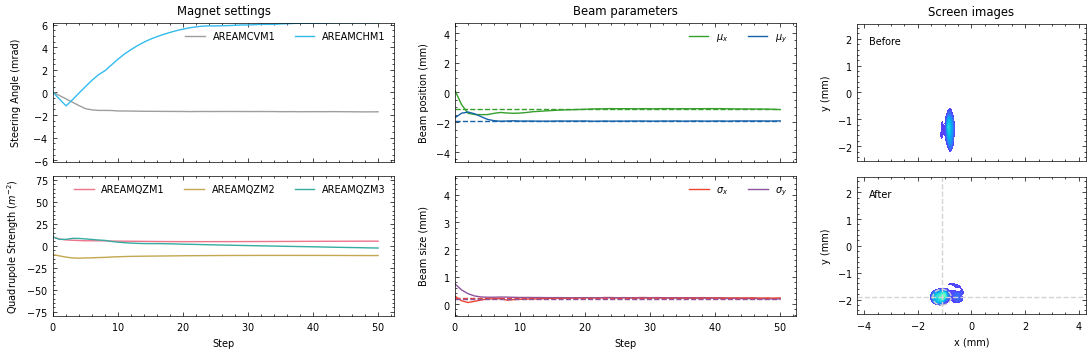

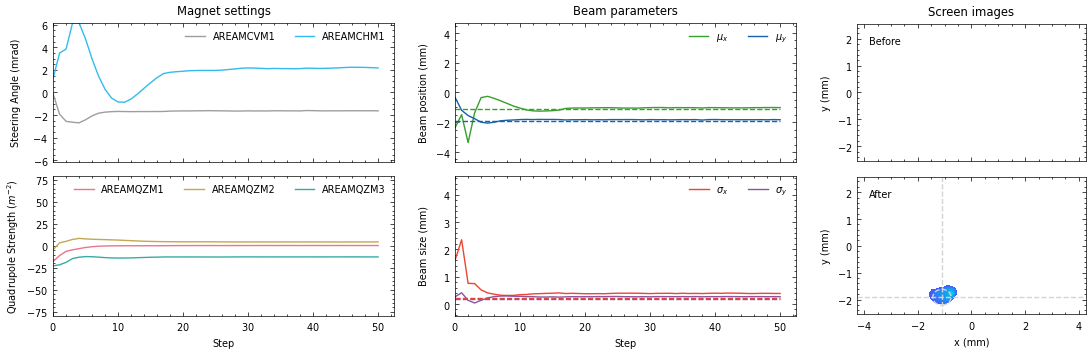

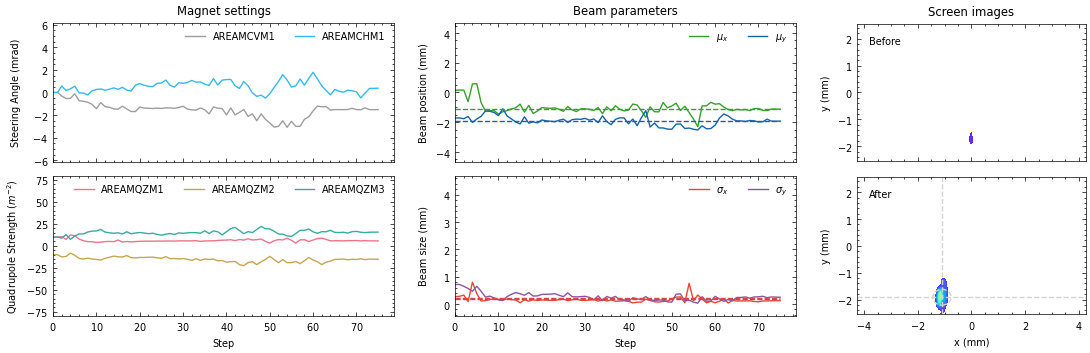

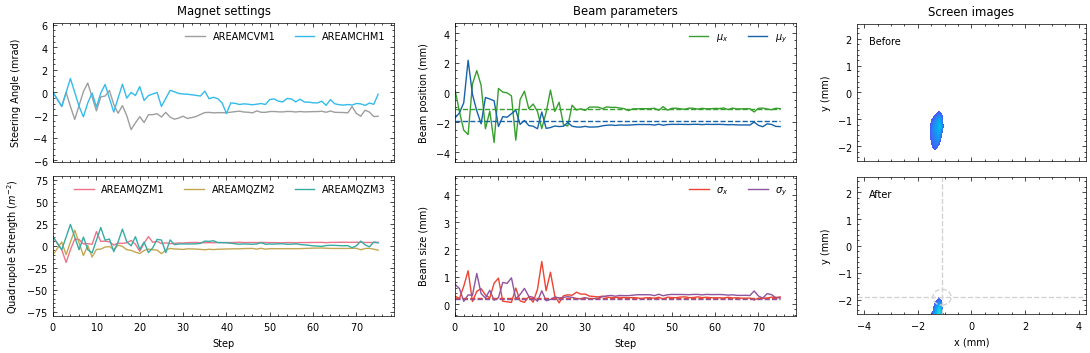

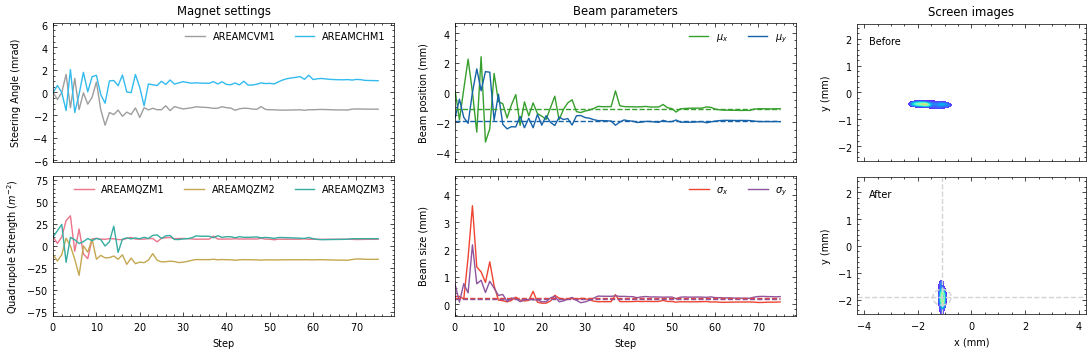

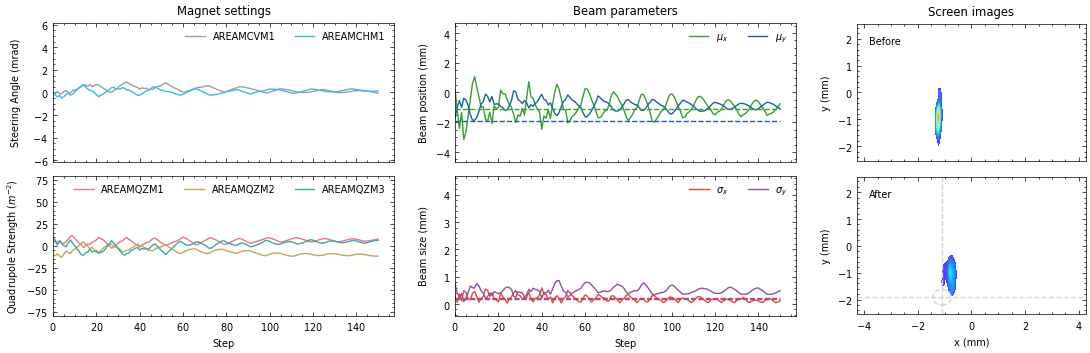

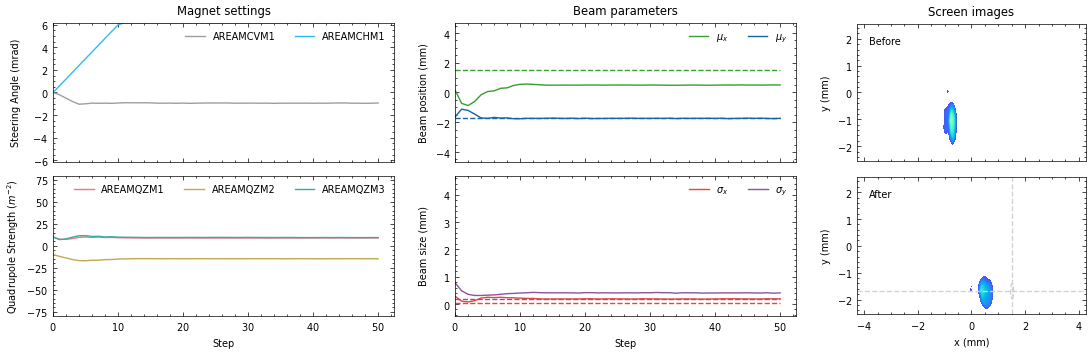

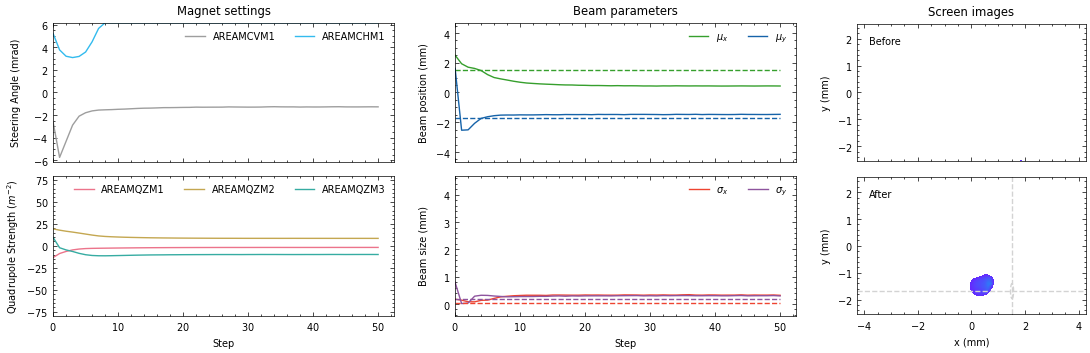

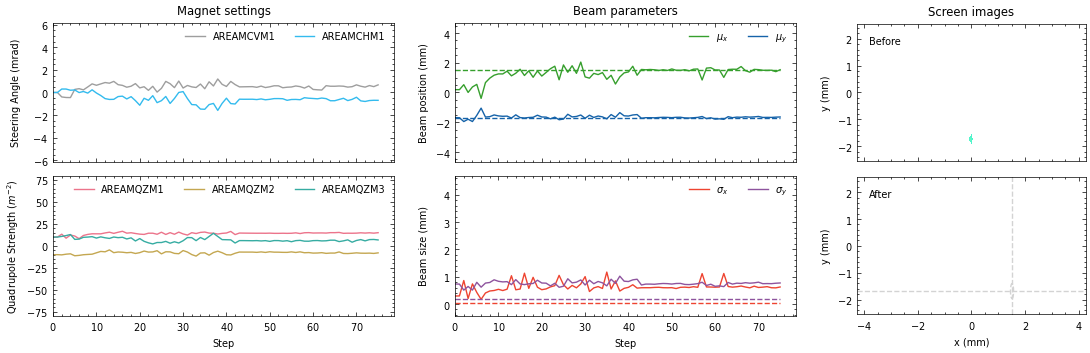

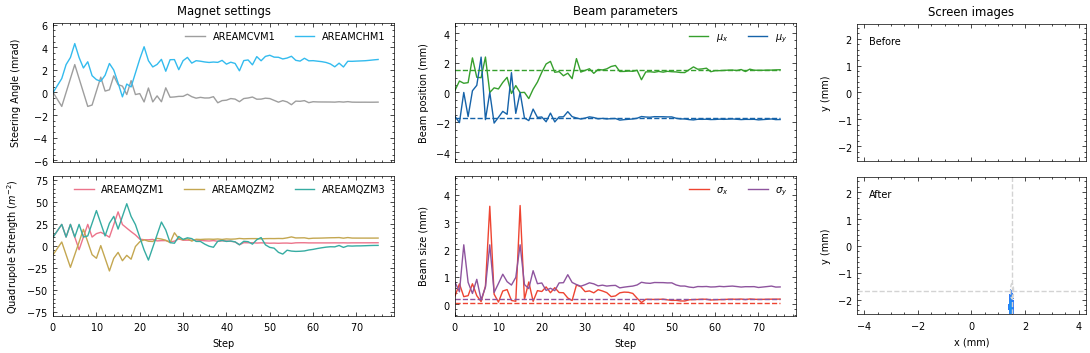

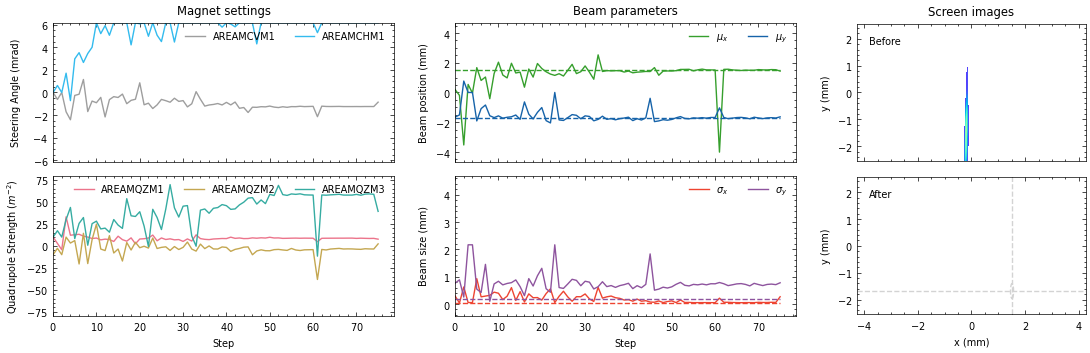

 51%|█████     | 38/75 [23:40:31<23:03:09, 2242.95s/it]


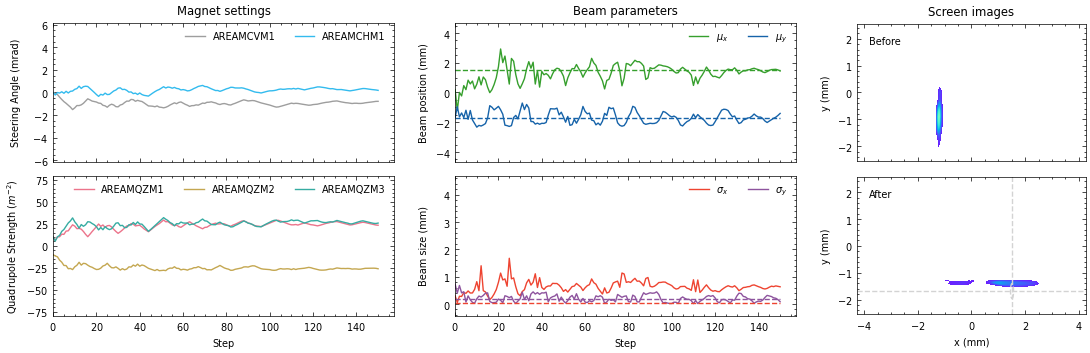

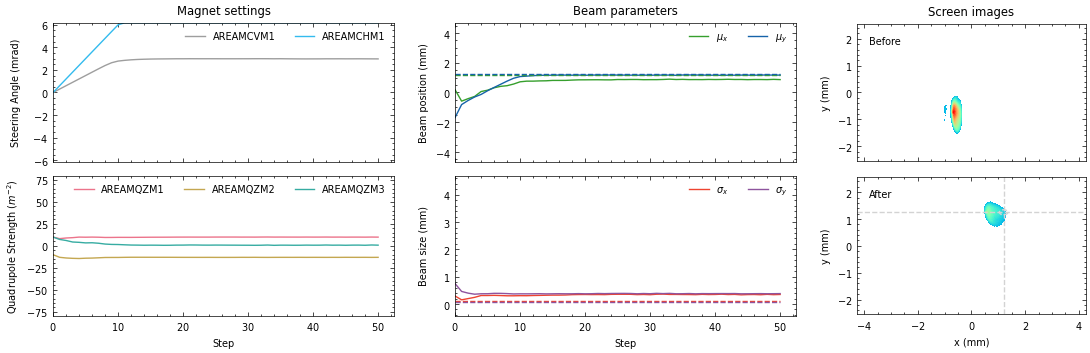

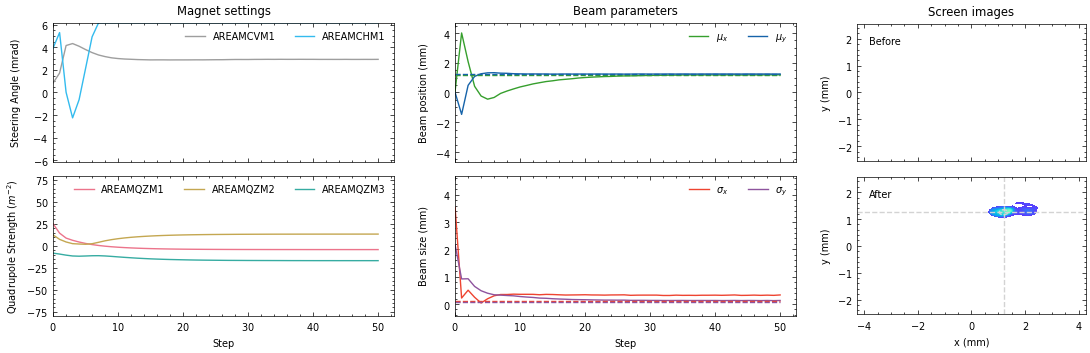

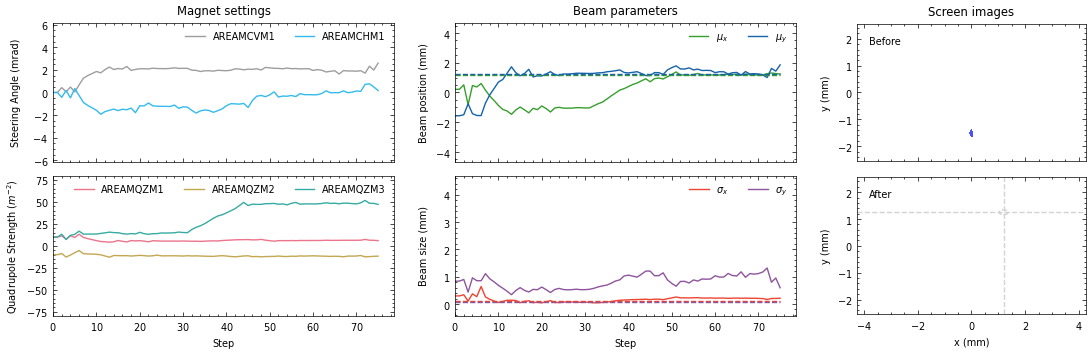

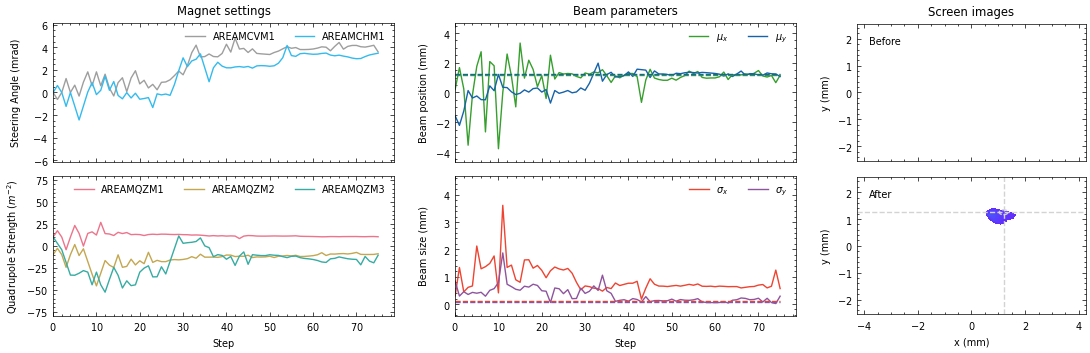

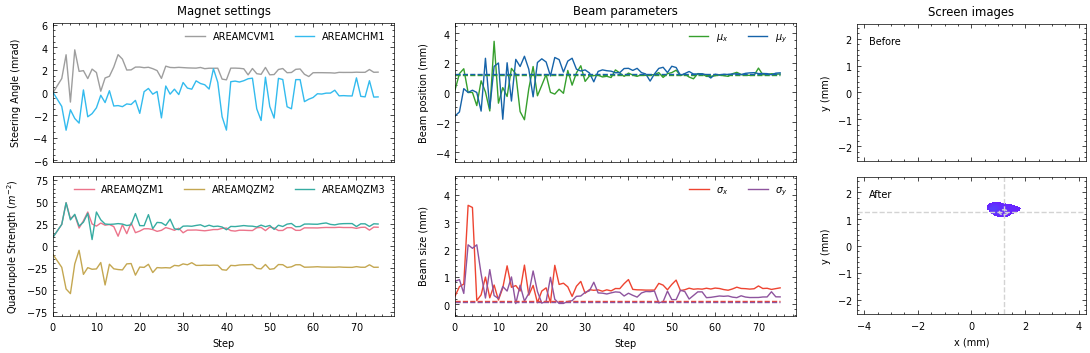

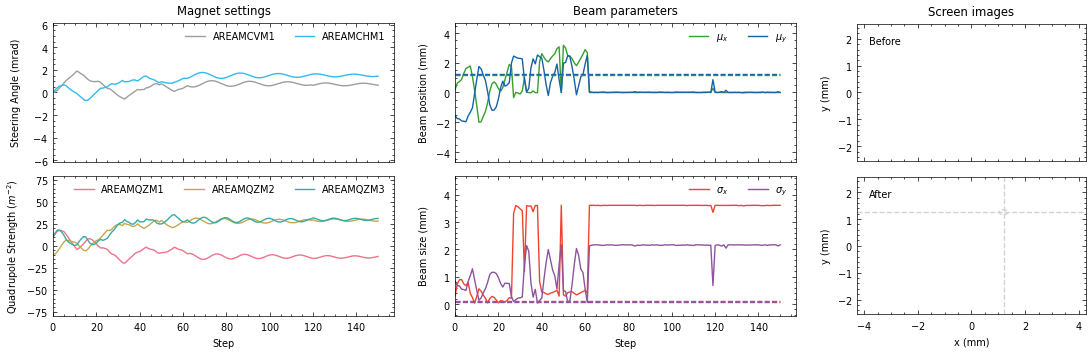

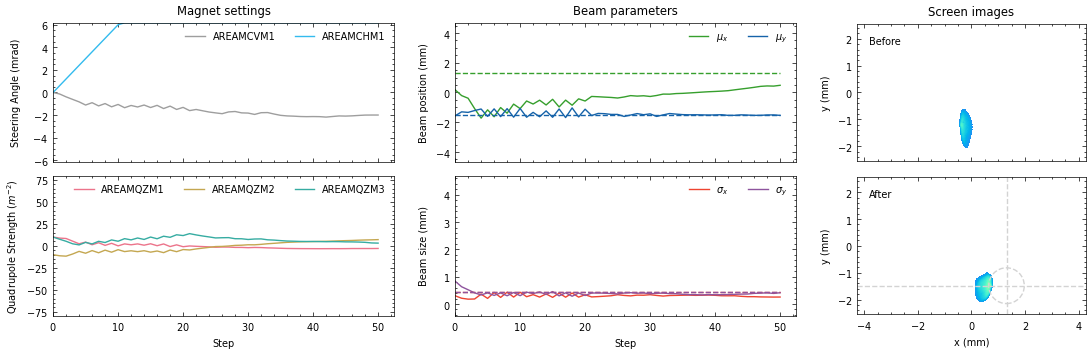

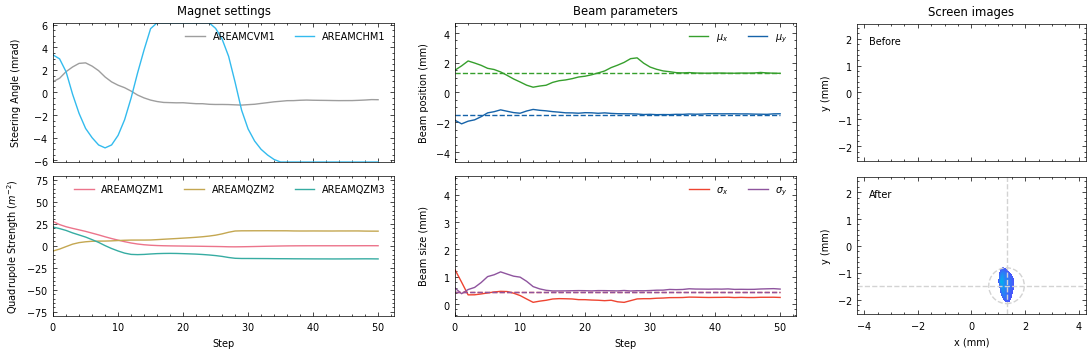

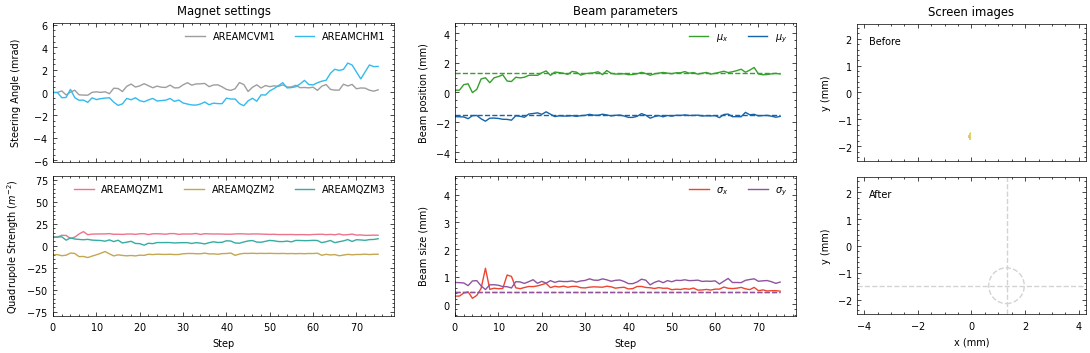

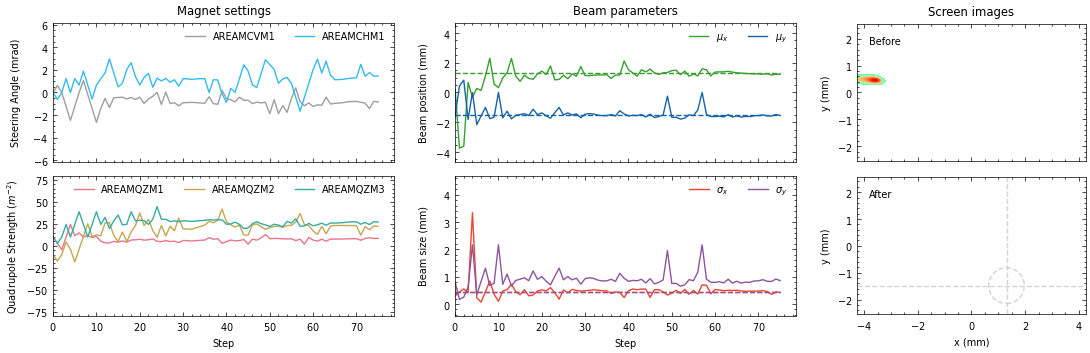

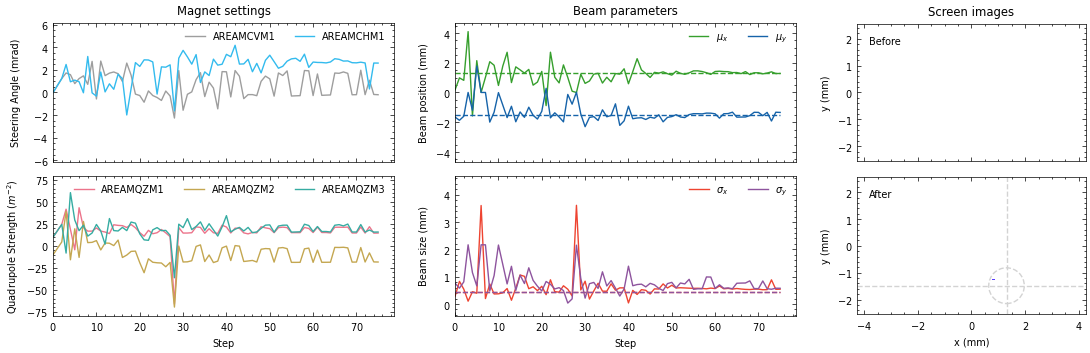

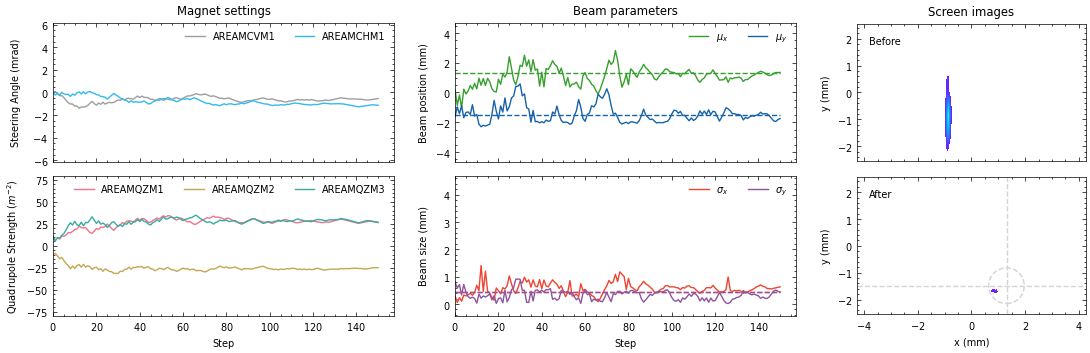

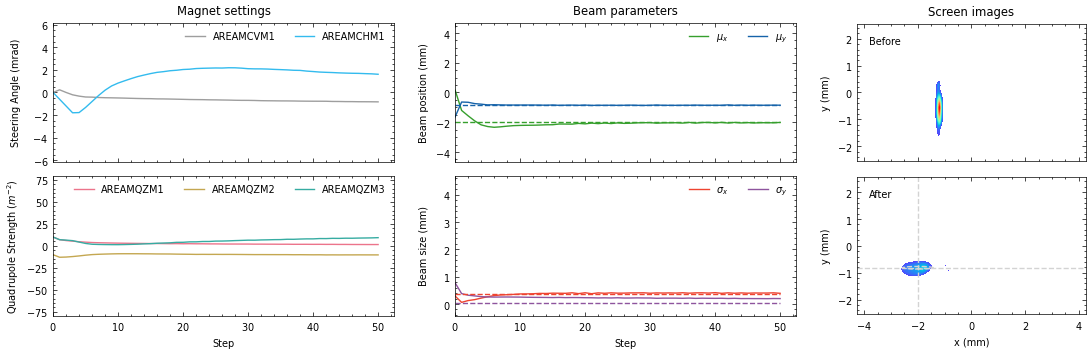

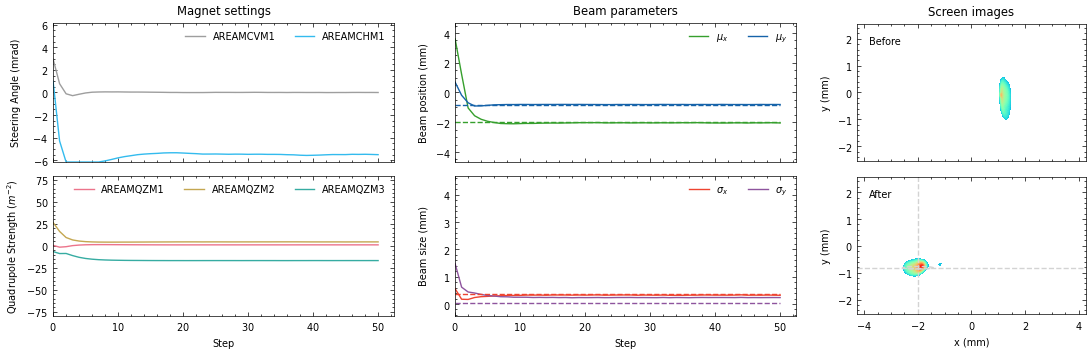

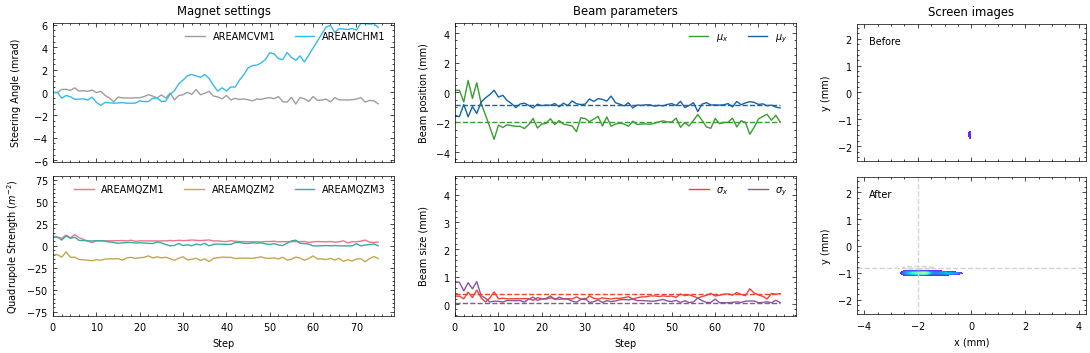

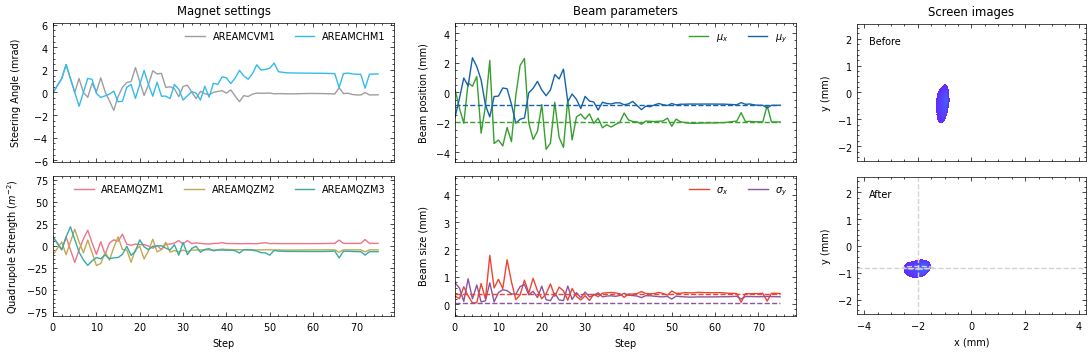

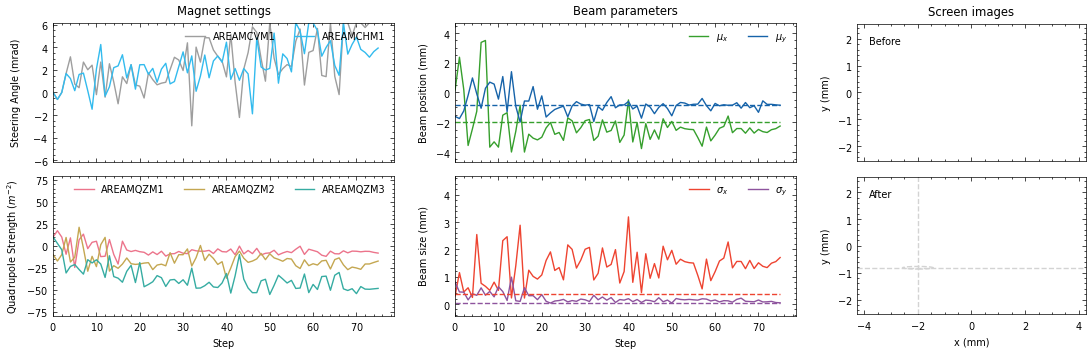

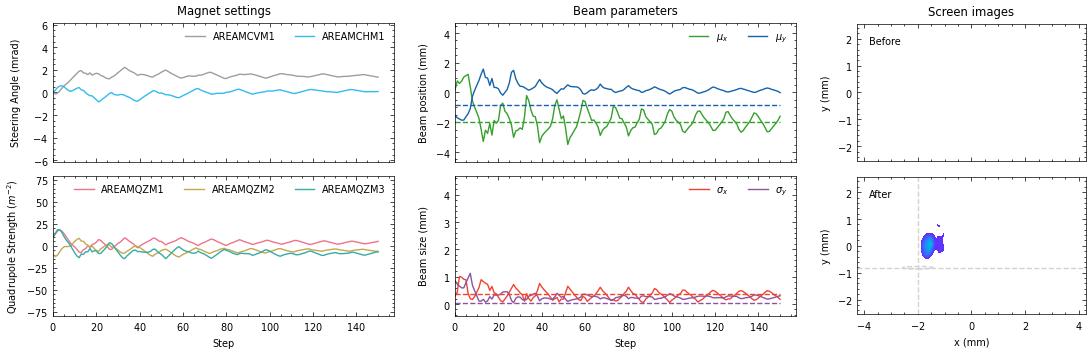

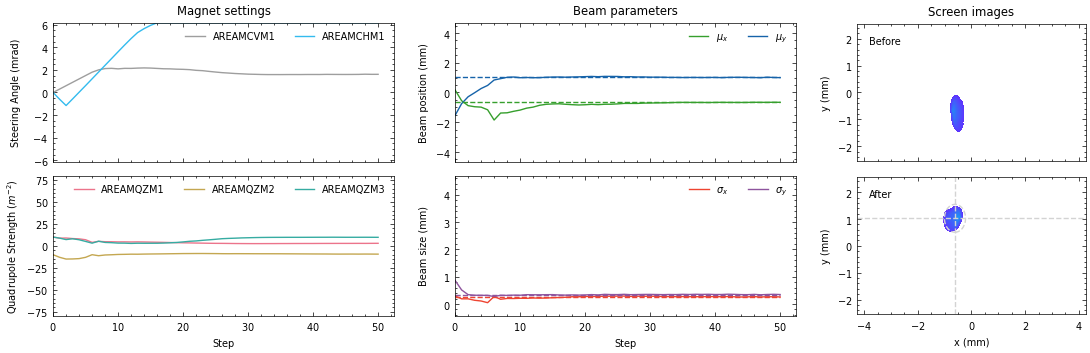

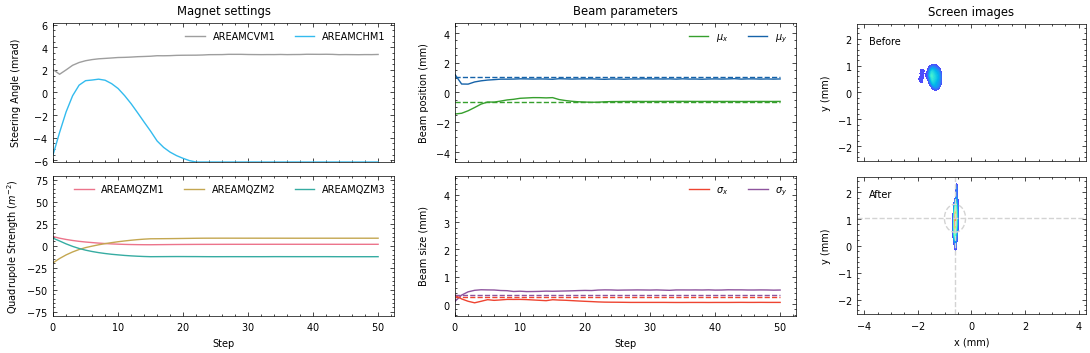

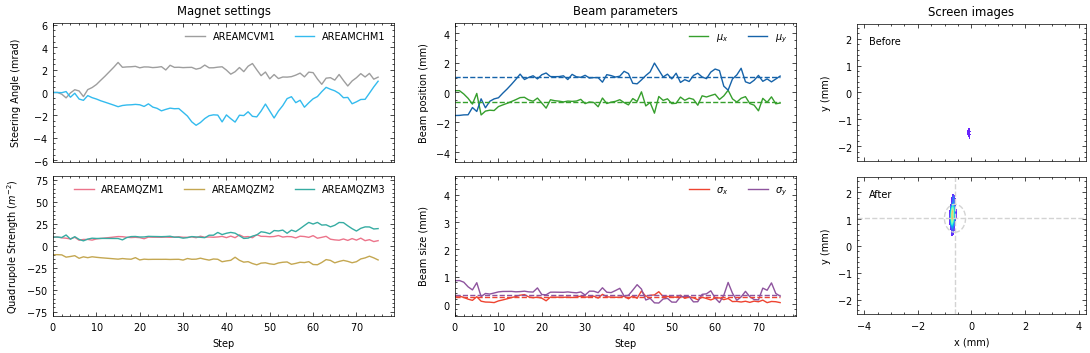

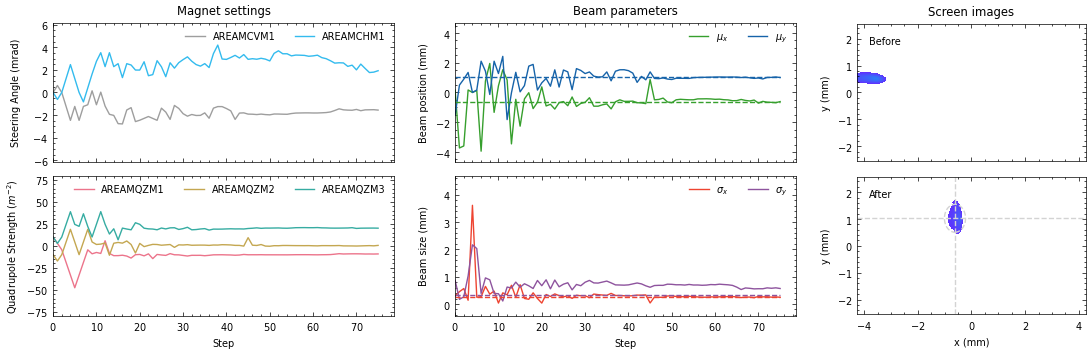

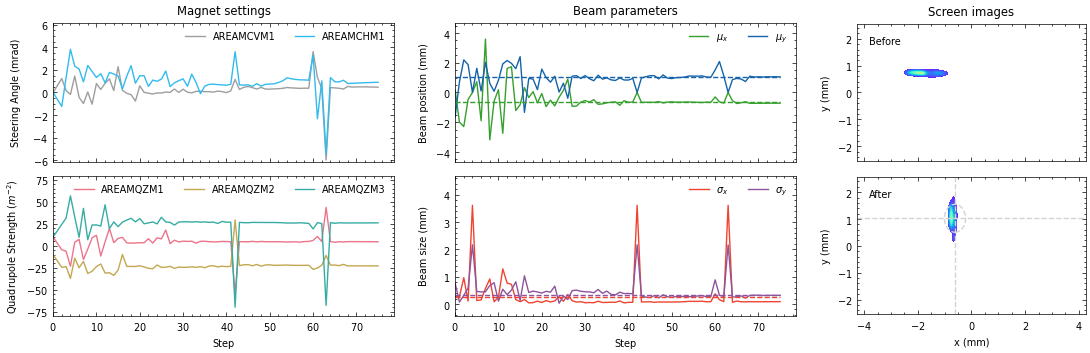

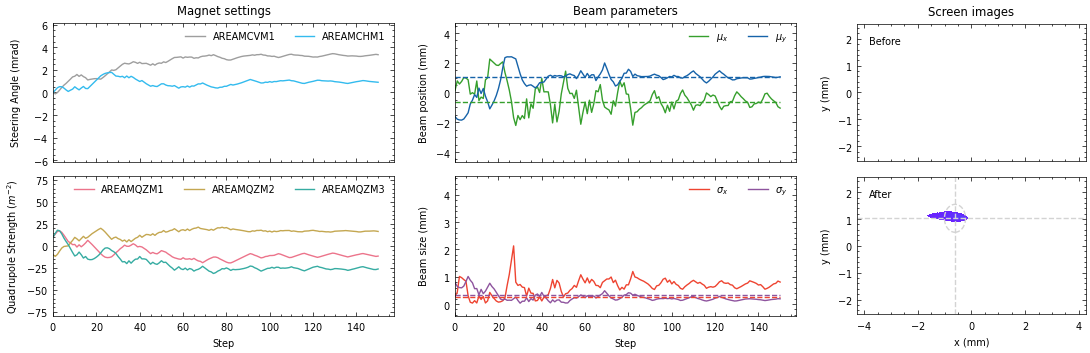

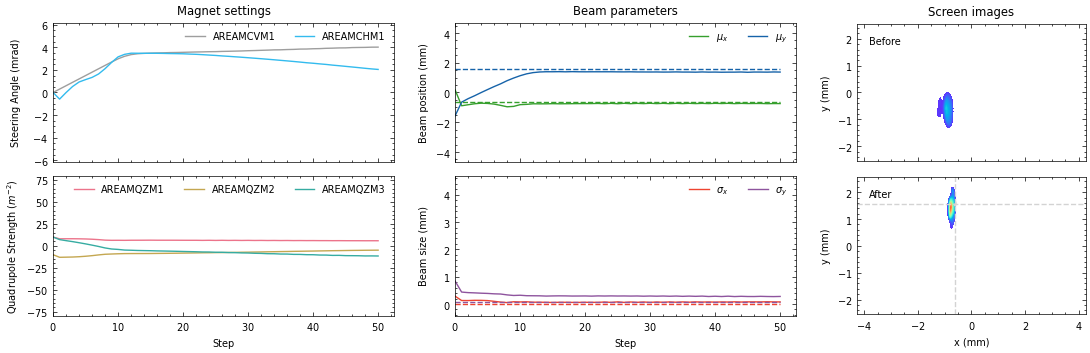

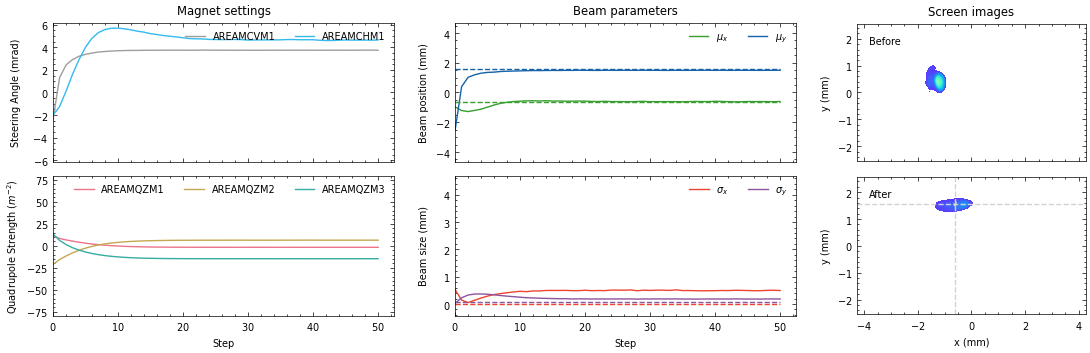

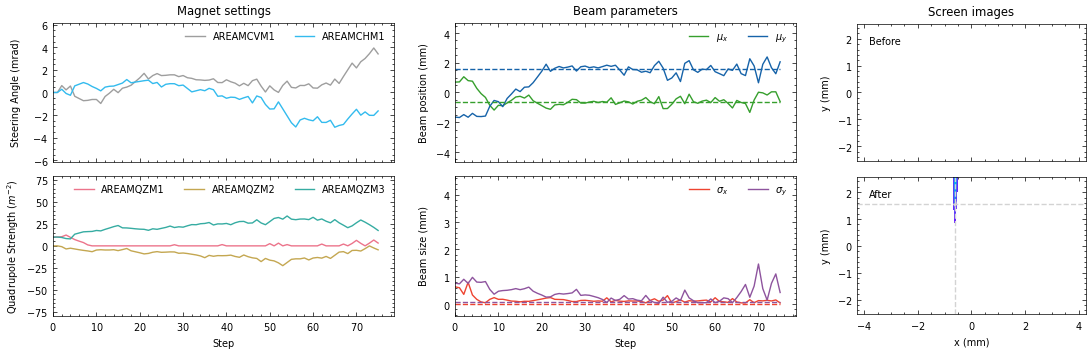

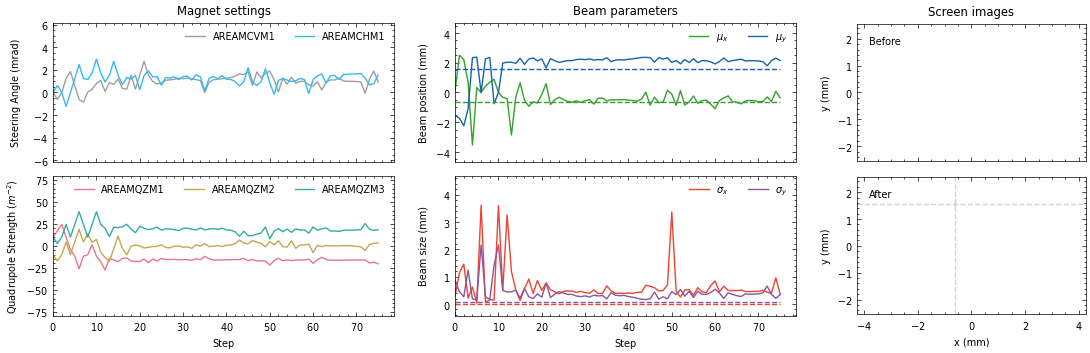

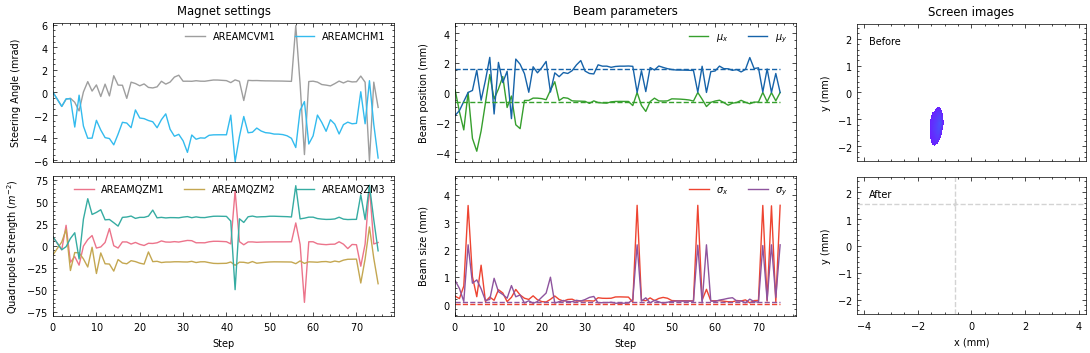

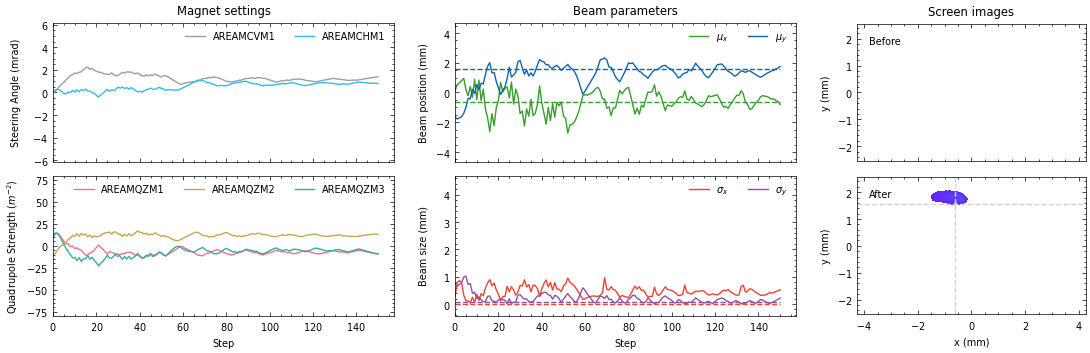

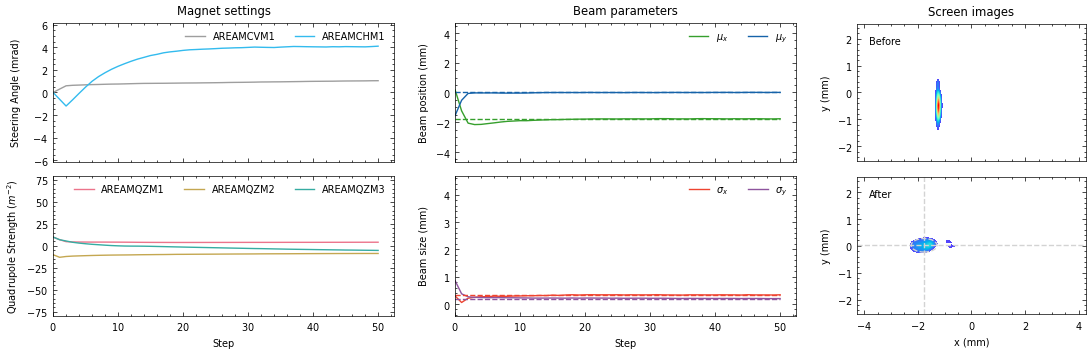

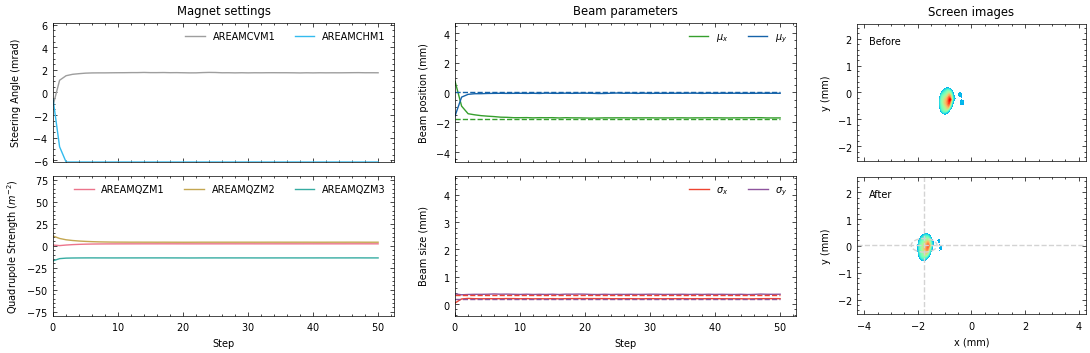

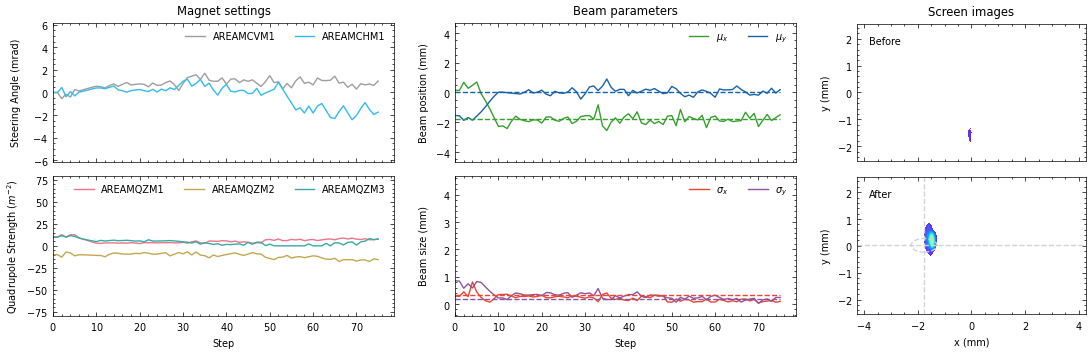

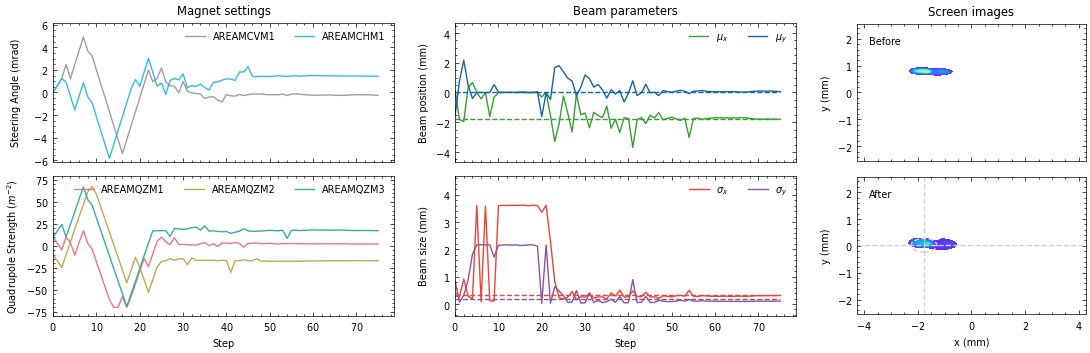

In [12]:
for trial_index in TRIAL_INDICES:
    comment = f"trial_{trial_index:03d}"

    # Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
    target_mu_x = trials[trial_index].target_beam[0]
    target_sigma_x = trials[trial_index].target_beam[1]
    target_mu_y = trials[trial_index].target_beam[2]
    target_sigma_y = trials[trial_index].target_beam[3]
    target_mu_x_threshold = 3.3198e-9
    target_mu_y_threshold = 3.3198e-9
    target_sigma_x_threshold = 3.3198e-9
    target_sigma_y_threshold = 3.3198e-9

    # RL polished donkey -------------------------------------------------------
    reset_machine()

    optimize_rl_donkey(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=RL_MAX_STEPS,
        model_name="polished-donkey-996",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        backend=BACKEND,
    )

    # RL v3 --------------------------------------------------------------------
    reset_machine()

    optimize_rl_v3(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=RL_MAX_STEPS,
        model_name="balmy-sweep-115",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/rl_v3/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        backend=BACKEND,
        initial_magnets=trials[trial_index].initial_magnets,
    )

    # BO old -------------------------------------------------------------------
    reset_machine()

    optimize_bo_old(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=BO_MAX_STEPS,
        model_name="BO old",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/bo_old/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        acquisition="EI",
        init_samples=5,
        filter_action=None,
        magnet_init_values=np.array([10, -10, 0, 10, 0]),
        backend=BACKEND,
        set_to_best=False,
    )

    # BO hard ------------------------------------------------------------------
    reset_machine()

    optimize_xopt(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=BO_MAX_STEPS,
        model_name="Xopt BO hard",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/bo_hard/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        method="UCB",
        optimizer_kwargs={
            "beta": 2.0,
            "max_travel_distances": [0.1] * 5,
            "proximal_weights": None,
        },
        rescale_action=(-1, 1),  # TODO: Turn off?
        magnet_init_values=np.array([10, -10, 0, 10, 0]),
        backend=BACKEND,
        set_to_best=False,
    )

    # BO proximal --------------------------------------------------------------
    reset_machine()

    optimize_xopt(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=BO_MAX_STEPS,
        model_name="Xopt BO proximal",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/bo_proximal/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        method="UCB",
        optimizer_kwargs={
            "beta": 2.0,
            "proximal_weights": 0.5,
            "max_travel_distances": [1.0, 1.0, 1.0, 1.0, 1.0],
        },
        rescale_action=(-1, 1),  # TODO: Turn off?
        magnet_init_values=np.array([10, -10, 0, 10, 0]),
        backend=BACKEND,
        set_to_best=False,
    )

    # ES -----------------------------------------------------------------------
    reset_machine()

    optimize_xopt(
        target_mu_x=target_mu_x,
        target_sigma_x=target_sigma_x,
        target_mu_y=target_mu_y,
        target_sigma_y=target_sigma_y,
        target_mu_x_threshold=target_mu_x_threshold,
        target_sigma_x_threshold=target_sigma_x_threshold,
        target_mu_y_threshold=target_mu_y_threshold,
        target_sigma_y_threshold=target_sigma_y_threshold,
        max_steps=ES_MAX_STEPS,
        model_name="Xopt ES",
        logbook=True,
        data_log_dir=(
            f"../data/bo_vs_rl/real/es/{datetime.now():%Y%m%d%H%M}_{comment}"
            if LOG_DATA
            else None
        ),
        progress_bar=True,
        callback=None,
        method="ES",
        optimizer_kwargs={
            "k": 3.7,
            "oscillation_size": 0.11,
            "decay_rate": 0.987,
        },  # Tuned
        rescale_action=(-1, 1),
        magnet_init_values=np.array([10, -10, 0, 10, 0]),
        backend=BACKEND,
        set_to_best=False,
    )